### Import packages

In [1]:
import pandas as pd
import numpy as np
import merging_functions as mf ### this package included part of the code that are repeated
                                 # throughout to make it more efficient
import matplotlib.pyplot as plt

### Define city and work folder

In [2]:
city='Chicago'

FIPS = [17031, 17043, 17089, 17093, 17097, 17111, 17197]

folder = 'Input_Files/'+city+'/'
out_folder = 'Output/'

### Load Stata Output File for Comparison

In [3]:
output = pd.read_stata(out_folder + 'Chicago_merge_0805aff_approach.dta')
output.head(2)

,trtid10,FIPS,NAME,QName,NATION,STATE,county2,CT,pop_check_90,carcommute_90,...,high_pdmt_80120_00,mod_pdmt_80120_00,low_pdmt_55cut_80120_medhhinc_00,high_pdmt_55cut_80120_00,mod_pdmt_55cut_80120_medhhinc_00,mix_low_55cut_80120_medhhinc_00,mix_mod_55cut_80120_medhhinc_00,mix_high_55cut_80120_medhhinc_00,inc_cat_55cut_80120_medhhinc_00,_merge_inclevel_2000
0,17031000000,NaN,,,,,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,master only (1)
1,17031010100,1.703101e+10,Census Tract 101,"Census Tract 101, Cook County, Illinois",00,17,031,010100,6388.29166,1476.520312,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,matched (3)


In [4]:
output = output[~output['FIPS'].isna()]
output['FIPS'] = output['FIPS'].apply(np.int).apply(lambda x: '{0:0>10}'.format(x))

### Load base merge file

Also called joined_data_030619_cleaned

In [5]:
### Load file
raw_data=pd.read_stata(folder+'joined_data_030619_cleaned.dta')

### Drop 2016 data
raw_data_dropped = raw_data[raw_data.columns.drop(list(raw_data.filter(regex='_16')))]

### Rename trtid10 to FIPS and reformat number
base_data = mf.trtid10_to_FIPS(raw_data_dropped)

base_data.head(1)

,FIPS,NAME,QName,NATION,STATE,county2,CT,pop_check_90,carcommute_90,units_pre40_90,...,tot_jobs,chicago,_merge_old,co_med_indinc16,moveinincd16,per_limove16,_merge_09mover2,per_limove09,co_med_indinc09,moveinincd09
0,17031010100,Census Tract 101,"Census Tract 101, Cook County, Illinois",00,17,031,010100,6388.29166,1476.520312,1851.130054,...,431.0,1.0,matched (3),29830.0,555.0,0.530557,both in master and using data,0.550599,30822.609375,526.047729


### Load income 1990 data

In [6]:
### Load file
raw_income_data=pd.read_stata(folder+'income1990.dta')

### Rename trtid10 to FIPS and reformat number
income_1990 = mf.trtid10_to_FIPS(raw_income_data)

### Drop irrelevant columnsb
income_1990 = income_1990.drop(columns = ['DIVISION', 'REGION', 'NATION',
                            'QName', 'GEOCOMP', 'NAME',
                            'STATE', 'COUNTY', 'CT', 'SUMLEV'])
income_1990.head(1)

,FIPS,countymedian_income90,hinc_90,hinc_00,hinc_16,_merge_hinc,regmedian_income90,vli1990,li1990,mi1990,hmi1990,hi1990,vhi1990
0,17031010100,32673.0,16487.810547,27589.609375,29861.0,matched (3),28214.0,0.448268,0.191549,0.084023,0.080482,0.067711,0.127968


### Load ACS 2000 data

In [7]:
### Load file
raw_acs_2000=pd.read_stata(folder+'2000_a.dta')

### Keep only relevant columns
acs_2000 = raw_acs_2000[['pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00',
                            'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00',
                            'trtid10', 'per_carcommute_00']].copy(deep=True)

### Rename trtid10 to FIPS and reformat number
acs_2000 = mf.trtid10_to_FIPS(acs_2000)

acs_2000.head(1)

,pop_00,white_00,nhblk_00,asian_00,hisp_00,per_nonwhite_00,per_nhblk_00,per_hisp_00,per_asian_00,FIPS,per_carcommute_00
0,4326.0,4157.0,30.0,0.0,91.0,0.039066,0.006935,0.021036,0.0,17001000100,0.9095


##### This section double checks that FIPS == trtid10

In [8]:
raw_acs_2000['trtid10'] = raw_acs_2000['trtid10'].apply(np.int).apply(lambda x: '{0:0>11}'.format(x)) 
a = len(raw_acs_2000[raw_acs_2000['FIPS']==raw_acs_2000['trtid10']])
b = len(raw_acs_2000)

if a ==b:
    print ('FIPS and trtid10 match up')
else:
    print ('There is an error in the database')

FIPS and trtid10 match up


### Load income 2000 data

In [9]:
### Load file
# Contains median household incomes for 1990,2000 & 2017 ****** THIS IS NOT TRUE - 2016 -
# & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
raw_income_2000=pd.read_stata(folder+'income2000.dta')

### Keep only relevant columns
income_2000 = raw_income_2000[['trtid10', 'countymedian_income00', 'hinc_90',
                               'hinc_00', 'hinc_16',
                               'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000']]

### Rename trtid10 to FIPS and reformat number
income_2000 = mf.trtid10_to_FIPS(income_2000)

income_2000.head(1)

,FIPS,countymedian_income00,hinc_90,hinc_00,hinc_16,vli2000,li2000,mi2000,hmi2000,hi2000,vhi2000
0,17031010100,45922.0,16487.810547,27589.609375,29861.0,0.403208,0.19486,0.092804,0.068178,0.072629,0.168321


### Load income 2017 data

In [10]:
### Load file
# Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
raw_income_2017=pd.read_stata(folder+'income2017.dta')

### Keep only relevant columns
income_2017 = raw_income_2017[['trtid10', 'hinc_17', 'regmedhhi_17',
                               'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017']]

### Rename trtid10 to FIPS and reformat number
income_2017 = mf.trtid10_to_FIPS(income_2017)

income_2017.head(5)

,FIPS,hinc_17,regmedhhi_17,vli2017,li2017,mi2017,hmi2017,hi2017,vhi2017
0,17031010100,33750.0,63938.0,0.483913,0.100855,0.066701,0.127925,0.039933,0.180674
1,17031010201,40841.0,63938.0,0.413214,0.177074,0.104373,0.072708,0.074427,0.158203
2,17031010202,36563.0,63938.0,0.462271,0.229227,0.064894,0.036328,0.076254,0.131025
3,17031010300,36870.0,63938.0,0.384206,0.230547,0.083216,0.060197,0.100088,0.141746
4,17031010400,39634.0,63938.0,0.373028,0.244572,0.081640,0.040560,0.073854,0.186347


In [11]:
### Double check with ACS 17-5Yr Estimates
### Load file
# Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
raw_ACS_2017_income=pd.read_csv(folder+'ACS_17_5YR_S1901_with_ann.csv')
ACS_2017_income = raw_ACS_2017_income.drop(raw_ACS_2017_income.index[0]).reset_index(drop = True)
ACS_2017_income = ACS_2017_income[['GEO.id2','HC01_EST_VC13']]
ACS_2017_income = ACS_2017_income.rename(columns = {'GEO.id2':'FIPS'})
ACS_2017_income[ACS_2017_income['FIPS']=='17031010100']

,FIPS,HC01_EST_VC13
139,17031010100,33750


In [12]:
print('hinc_17 is the HH median income for 2017')

hinc_17 is the HH median income for 2017


### Load renter and homeowner data 2017

In [13]:
# ## Load file
# Contains 2017 owner & rental occupied housing, population, household units
# Contains median household income, college, homes build prior to 1950  #### ??!!
raw_tenure_2017=pd.read_stata(folder+'2017_102618.dta')

### Rename trtid10 to FIPS and reformat number
tenure_2017 = mf.trtid10_to_FIPS(raw_tenure_2017)

### Keep only relevant columns
tenure_2017 = tenure_2017.drop(columns = ['hinc_17'])

tenure_2017.columns

Index(['FIPS', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17_se',
       'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17',
       'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17',
       'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17',
       'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17',
       'per_units_pre50_17', 'per_built_00_17', 'per_rent_17_se', 'col_17_se',
       'per_col_17_se'],
      dtype='object')

### Load ACS Census Data 1990 data

In [14]:
### Load file
raw_acs_1990=pd.read_stata(folder+'nonwhite_90.dta')

### Keep only relevant columns
acs_1990 = raw_acs_1990[['r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001',
                            'trtid10']].copy(deep=True)

### Rename trtid10 to FIPS and reformat number
acs_1990 = mf.trtid10_to_FIPS(acs_1990)

acs_1990.head(1)

,r_per_nonwhite_90,nhwhite_90,RC1990SF3_001_P012_001,FIPS
0,0.018438,4312.000023,4393.000023,17001000100


### Load movers 2009 data

In [15]:
### Load file
# Contains regional medain , 2009 movein totals, percent low income move-in in 2009
raw_movers_2009=pd.read_stata(folder+'2009_movers.dta')

### Keep only relevant columns
movers_2009 = raw_movers_2009.drop(columns = 'FIPS')

### Rename trtid10 to FIPS and reformat number
movers_2009 = mf.trtid10_to_FIPS(movers_2009)

movers_2009.head(1)

,reg_medindinc_09,moveinincd09,per_limove09,FIPS
0,32436.0,0.0,NaN,17031000000


### Load movers 2010 data

In [16]:
### Load file
raw_movers_2010=pd.read_stata(folder+'YearHouseholderMovedIn_Chicago2010.dta')

### Rename trtid10 to FIPS and reformat number
movers_2010 = mf.trtid10_to_FIPS(raw_movers_2010)

movers_2010.head(1)

,FIPS,GEOID,NAME,QName,STUSAB,SUMLEV,GEOCOMP,FILEID,LOGRECNO,US,...,pct_renter_recentmovein,pct_owner_recentmovein,pct_tot_recentmovein,pct_renter_recentmovein2010,pct_owner_recentmovein2010,pct_tot_recentmovein2010,rm_pct_recentmovein,aboverm_pct_recentmovein,rm_pct_recentmovein2010,aboverm_pct_recentmovein2010
0,17031010100,14000US17031010100,"Census Tract 101, Cook County, Illinois","Census Tract 101, Cook County, Illinois",il,140,00,ACSSF,0005866,,...,0.131635,0.06044,0.120107,0.696921,0.082418,0.59742,0.086522,1.0,0.379526,1.0


### Load Year HHed Moved In

In [17]:
### Load file
raw_movin_year=pd.read_stata(folder+'YearHouseholderMovedIn_Chicago2010.dta')

### Rename trtid10 to FIPS and reformat number
movin_year = mf.trtid10_to_FIPS(raw_movin_year)

### Rename Standard Deviations Columns
movin_year = movin_year.rename(columns = {'B25038001s':'se_occupiedunits',
                                         'B25038002s':'se_owneroccunits',
                                         'B25038003s':'se_ownerocc_2015orlater',
                                         'B25038004s':'se_ownerocc_2010to2014',
                                         'B25038005s':'se_ownerocc_2000to2009',
                                         'B25038006s':'se_ownerocc_1990to1999',
                                         'B25038007s':'se_ownerocc_1980to1989',
                                         'B25038008s':'se_ownerocc_1979orearlier',
                                         'B25038009s':'se_renteroccunits',
                                         'B25038010s':'se_renterocc_2015orlater',
                                         'B25038011s':'se_renterocc_2010to2014',
                                         'B25038012s':'se_renterocc_2000to2009',
                                         'B25038013s':'se_renterocc_1990to1999',
                                         'B25038014s':'se_renterocc_1980to1989',
                                         'B25038015s':'se_renterocc_1979orearlier'})

### Keep only relevant columns
movin_year = movin_year[['FIPS', 'se_occupiedunits', 'se_owneroccunits',
                         'se_ownerocc_2015orlater', 'se_ownerocc_2010to2014', 'se_ownerocc_2000to2009',
                         'se_ownerocc_1990to1999', 'se_ownerocc_1980to1989', 'se_ownerocc_1979orearlier',
                         'se_renteroccunits', 'se_renterocc_2015orlater', 'se_renterocc_2010to2014',
                         'se_renterocc_2000to2009', 'se_renterocc_1990to1999', 'se_renterocc_1980to1989',
                         'pct_renter_recentmovein', 'pct_owner_recentmovein', 'pct_tot_recentmovein',
                         'pct_renter_recentmovein2010', 'pct_owner_recentmovein2010', 'pct_tot_recentmovein2010',
                         'rm_pct_recentmovein', 'aboverm_pct_recentmovein', 'rm_pct_recentmovein2010',
                         'aboverm_pct_recentmovein2010', 'occupiedunits', 'owneroccunits',
                         'ownerocc_2015orlater', 'ownerocc_2010to2014', 'ownerocc_2000to2009',
                         'ownerocc_1990to1999', 'ownerocc_1980to1989', 'renteroccunits', 'renterocc_2015orlater',
                         'renterocc_2010to2014','renterocc_2000to2009', 'renterocc_1990to1999',
                         'renterocc_1980to1989']]


movin_year.head(1)

,FIPS,se_occupiedunits,se_owneroccunits,se_ownerocc_2015orlater,se_ownerocc_2010to2014,se_ownerocc_2000to2009,se_ownerocc_1990to1999,se_ownerocc_1980to1989,se_ownerocc_1979orearlier,se_renteroccunits,...,ownerocc_2010to2014,ownerocc_2000to2009,ownerocc_1990to1999,ownerocc_1980to1989,renteroccunits,renterocc_2015orlater,renterocc_2010to2014,renterocc_2000to2009,renterocc_1990to1999,renterocc_1980to1989
0,17031010100,100.0,83.636364,18.181818,9.090909,70.30303,38.181818,6.666667,23.030303,132.727273,...,8,233,60,0,1884,248,1065,512,53,0


### Load exclusive zones data

In [18]:
### Load file
raw_exclusive_zone=pd.read_csv(folder+'Chicago_Proximity.csv')

## Drop rows without data
raw_exclusive_zone = raw_exclusive_zone.dropna().reset_index(drop=True)

###Rename variable
raw_exclusive_zone = raw_exclusive_zone.rename(columns = {'excli':'exclusive'})

### Rename trtid10 to FIPS and reformat number
exclusive_zone = mf.trtid10_to_FIPS(raw_exclusive_zone)

### Keep only relevant columns
exclusive_zone = exclusive_zone[['FIPS', 'proximity', 'exclusive']]

### Convert dummy to int
exclusive_zone['exclusive'] = exclusive_zone['exclusive'].astype(int)

### Keep only records for the census tracts defined in FIPS variable
exclusive_zone['FIPS_temp']=exclusive_zone['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
exclusive_zone = exclusive_zone[exclusive_zone['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
exclusive_zone = exclusive_zone.drop(columns='FIPS_temp')

exclusive_zone.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,proximity,exclusive
0,17031010201,0,0
1,17031030200,0,0
2,17031031700,0,0
3,17031031900,1,0
4,17031050200,1,0


### Load mortgage application data

In [19]:
### Load file
raw_mortgage=pd.read_stata(folder+'Chicago_HMDA_Denial_Application_Rates.dta')

### Rename trtid10 to FIPS and reformat number
mortgage = mf.trtid10_to_FIPS(raw_mortgage)

### Convert dummy to int
mortgage['low_app_rate'] = mortgage['low_app_rate'].astype(int)

### Keep only relevant columns
mortgage = mortgage[['FIPS', 'owneroccunits', 'renterocc_units',
                                 'per_own_17', 'per_rent_17', 'tot_units', 'applicationrate',
                                 'high_dr20', 'high_dr25', 'high_dr30', 'low_app_rate']]
mortgage.head()

,FIPS,owneroccunits,renterocc_units,per_own_17,per_rent_17,tot_units,applicationrate,high_dr20,high_dr25,high_dr30,low_app_rate
0,17031010100,364,1884,16.190001,83.809998,2248.0,0.044039,0.0,0.0,0.0,1
1,17031010201,781,1889,29.250000,70.750000,2670.0,0.067416,1.0,0.0,0.0,0
2,17031010202,262,714,26.840000,73.160004,976.0,0.070697,0.0,0.0,0.0,0
3,17031010300,917,2065,30.750000,69.250000,2982.0,0.046613,0.0,0.0,0.0,1
4,17031010400,345,1525,18.450001,81.550003,1870.0,0.033690,0.0,0.0,0.0,1


### Load public housing data

In [20]:
### Load file
raw_pub_housing=pd.read_stata(folder+'ph-LIHTC_merge_chicago_062519.dta')

## Rename trtid10 to FIPS and reformat number
pub_housing = mf.trtid10_to_FIPS(raw_pub_housing)

### Keep only relevant columns
pub_housing = pub_housing[['FIPS', 'presence_ph_LIHTC']]
pub_housing['presence_ph_LIHTC']=pub_housing['presence_ph_LIHTC'].astype(int)

pub_housing.head()

,FIPS,presence_ph_LIHTC
0,17031010100,1
1,17031010201,1
2,17031010202,1
3,17031010300,1
4,17031010400,1


### Load prison data

In [21]:
### Load file
raw_prison=pd.read_stata(folder+'ChicagoPrison_Processed.dta')

## Rename trtid10 to FIPS and reformat number
prison = mf.trtid10_to_FIPS(raw_prison)

### Keep only relevant columns
prison = prison[['FIPS', 'prison_pct', 'prison_flag', 'highprisonpop_flag']]

### Convert dummy to int
prison['prison_flag']=prison['prison_flag'].astype(int)
prison['highprisonpop_flag']=prison['highprisonpop_flag'].astype(int)

prison.head()

,FIPS,prison_pct,prison_flag,highprisonpop_flag
0,17031010100,0.0,0,0
1,17031010201,0.0,0,0
2,17031010202,0.0,0,0
3,17031010300,0.0,0,0
4,17031010400,0.0,0,0


### Prepare LI Home-ownership data

In [22]:
### Load file
raw_LI_HOW_flag=pd.read_stata(folder+'homeownershipflag_LIneighbs.dta')

## Rename trtid10 to FIPS and reformat number
LI_HOW_flag = mf.trtid10_to_FIPS(raw_LI_HOW_flag)

### Keep only records for the census tracts defined in FIPS variable
LI_HOW_flag['FIPS_temp']=LI_HOW_flag['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
LI_HOW_flag = LI_HOW_flag[LI_HOW_flag['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
LI_HOW_flag = LI_HOW_flag.drop(columns='FIPS_temp')

### Keep only relevant columns
LI_HOW_flag = LI_HOW_flag[['FIPS', 'LItract', 'homeownership_rm_LItracts', 'aboverm_homeownership_LItracts']]

### Convert dummy to int
LI_HOW_flag['LItract']=LI_HOW_flag['LItract'].astype(int)

# *** THIS SET OF CODE WON'T RUN BC OF NAN VALUES ***
# LI_HOW_flag['aboverm_homeownership_LItracts']=LI_HOW_flag['aboverm_homeownership_LItracts'].astype(int)

LI_HOW_flag.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,17031010100,1,40.440002,0.0
1,17031010201,1,40.440002,0.0
2,17031010202,1,40.440002,0.0
3,17031010300,1,40.440002,0.0
4,17031010400,1,40.440002,0.0


### Load foreclosure data

In [23]:
### Load file
raw_foreclosure=pd.read_stata(folder+'Chicago_Foreclosure_072019.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_foreclosure = raw_foreclosure.rename(columns = {'tractcode':'trtid10'})
foreclosure = mf.trtid10_to_FIPS(raw_foreclosure)

### Keep only relevant columns
foreclosure = foreclosure[['FIPS', 'estimated_foreclosure_rate', 'rm_foreclosure_rate', 'aboverm_foreclosurerate']]

### Convert dummy to int
foreclosure['aboverm_foreclosurerate']=foreclosure['aboverm_foreclosurerate'].astype(int)

foreclosure.head()

,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,17031000000,##############################################...,5.0,1
1,17031010100,4.8%,5.0,0
2,17031010200,6.1%,5.0,1
3,17031010300,4.8%,5.0,0
4,17031010400,3.7%,5.0,0


### Load neighborhood income level data

In [24]:
### Load file
raw_neigh_income=pd.read_stata(folder+'neighb_inc_level_053119.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_neigh_income = raw_neigh_income.rename(columns = {'stctytrct':'trtid10'})
neigh_income = mf.trtid10_to_FIPS(raw_neigh_income)

### Keep only records for the census tracts defined in FIPS variable
neigh_income['FIPS_temp']=neigh_income['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
neigh_income = neigh_income[neigh_income['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
neigh_income = neigh_income.drop(columns='FIPS_temp')

### Keep only relevant columns
neigh_income = neigh_income[['FIPS', 'reg_med_inc60_17', 'reg_med_inc120_17', 'reg_med_inc80_17',
                             'low_pdmt_80120', 'mod_pdmt_80120', 'high_pdmt_80120', 'low_pdmt_55cut_80120_medhhinc',
                             'high_pdmt_55cut_80120_medhhinc', 'mod_pdmt_55cut_80120_medhhinc',
                             'mix_low_55cut_80120_medhhinc', 'mix_mod_55cut_80120_medhhinc',
                             'mix_high_55cut_80120_medhhinc', 'inc_cat_55cut_80120_medhhinc']]

neigh_income.head() ### should be converted to dummies, but this should be changed from the variable definition

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,reg_med_inc60_17,reg_med_inc120_17,reg_med_inc80_17,low_pdmt_80120,mod_pdmt_80120,high_pdmt_80120,low_pdmt_55cut_80120_medhhinc,high_pdmt_55cut_80120_medhhinc,mod_pdmt_55cut_80120_medhhinc,mix_low_55cut_80120_medhhinc,mix_mod_55cut_80120_medhhinc,mix_high_55cut_80120_medhhinc,inc_cat_55cut_80120_medhhinc
0,17031010100,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17031010201,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,17031010202,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17031010300,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17031010400,38362.800781,76725.601562,51150.398438,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Load vacancy data

In [25]:
### Load file
raw_vacancy=pd.read_stata(folder+'IL_20175YR_vacancyrate.dta')

# ## Rename trtid10 to FIPS and reformat number
vacancy = mf.trtid10_to_FIPS(raw_vacancy)

### Keep only records for the census tracts defined in FIPS variable
vacancy['FIPS_temp']=vacancy['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
vacancy = vacancy[vacancy['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
vacancy = vacancy.drop(columns='FIPS_temp')

### Keep only relevant columns
vacancy = vacancy[['FIPS', 'vacancy_rate', 'rm_vacancy', 'vacancy_rm_flag']]

### Convert dummy to int
vacancy['vacancy_rm_flag']=vacancy['vacancy_rm_flag'].astype(int)

vacancy.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,17031010100,0.056740,0.035809,1
1,17031010201,0.056446,0.035809,1
2,17031010202,0.126645,0.035809,1
3,17031010300,0.060383,0.035809,1
4,17031010400,0.015780,0.035809,0


### Load housing units data

In [26]:
### Load file
raw_housing_units=pd.read_stata(folder+'2010_2017_units_v_HHs.dta')

# Reformat FIPS number
housing_units = raw_housing_units.copy(deep=True)
housing_units['FIPS'] = housing_units['FIPS'].apply(np.int).apply(lambda x: '{0:0>11}'.format(x))

### Keep only relevant columns
housing_units = housing_units[['FIPS', 'A10008_001', 'A10001_001', 'T058_001', 'T068_001', 'change_units_2010_2017']]

### Compute percent change in HH
housing_units['per_change_HHs_2010_2017'] = (housing_units['A10008_001'] - housing_units['T058_001'])/housing_units['T058_001']*100
housing_units['per_change_units_2010_2017'] = (housing_units['A10001_001'] - housing_units['T068_001'])/housing_units['T068_001']*100

# # ***** Flagging data *****
# Units increased less than HH over the period
# Change in HH > 0 - otherwise Flag == 0
df=housing_units
housing_units['flag_units_v_HHs'] = np.nan
df.loc[(df['per_change_units_2010_2017'] >= df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 0
df.loc[(df['per_change_units_2010_2017'] < df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 1
df.loc[(df['per_change_HHs_2010_2017'] <=0), 'flag_units_v_HHs'] = 0

# #Units increased MORE than regional median
rm_units_2010_2017 = (np.nanmedian(df['per_change_units_2010_2017']))
print('The regional median percent change in units is '+str(rm_units_2010_2017))
housing_units['flag_rm_units_change'] = np.nan
df.loc[(df['change_units_2010_2017'] >= rm_units_2010_2017), 'flag_rm_units_change'] = 1
df.loc[(df['change_units_2010_2017'] < rm_units_2010_2017), 'flag_rm_units_change'] = 0

### THIS IS FIXING THE CODE FOR FLAGGING DATA
### **** Check this again, but it was fine the first time ****

# rm_units_2010_2017_v2 = (np.nanmedian(df['per_change_units_2010_2017']))*100
# print('The regional median percent change in percent is '+str(rm_units_2010_2017_v2))
# housing_units['flag_rm_units_change_v2'] = np.nan
# df.loc[(df['per_change_units_2010_2017'] >= rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 1
# df.loc[(df['per_change_units_2010_2017'] < rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 0

### Keep only records for the census tracts defined in FIPS variable
housing_units['FIPS_temp']=housing_units['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
housing_units = housing_units[housing_units['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
housing_units = housing_units.drop(columns='FIPS_temp')

housing_units.head()

The regional median percent change in units is 0.1702127659574468
['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,17031010100,2248,2626,2302,2624,2.0,-2.345786,0.076220,0.0,1.0
1,17031010201,2670,2994,2463,2941,53.0,8.404385,1.802108,1.0,1.0
2,17031010202,976,1216,1115,1218,-2.0,-12.466368,-0.164204,0.0,0.0
3,17031010300,2982,3395,2826,3254,141.0,5.520170,4.333128,1.0,1.0
4,17031010400,1870,2218,2098,2311,-93.0,-10.867493,-4.024232,0.0,0.0


In [27]:
housing_units.describe()

,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1978.000000,1979.000000,1978.000000,1985.000000
mean,1559.240806,1708.463980,1555.746096,1699.121914,9.342066,inf,0.335955,0.335187,0.514358
std,813.776295,871.178233,777.013728,841.718176,108.975998,NaN,7.081180,0.472175,0.499920
min,0.000000,0.000000,0.000000,0.000000,-673.000000,-100.000000,-100.000000,0.000000,0.000000
25%,1054.000000,1181.000000,1066.000000,1175.000000,-38.000000,-4.092231,-2.562469,0.000000,0.000000
50%,1466.000000,1616.000000,1475.000000,1609.000000,2.000000,-0.419482,0.170213,0.000000,1.000000
75%,1917.000000,2095.000000,1924.000000,2089.000000,41.000000,3.584437,2.668414,1.000000,1.000000
max,11012.000000,12237.000000,9751.000000,11681.000000,1372.000000,inf,87.037037,1.000000,1.000000


In [28]:
#### COMPARE TO OBTAINED OUTPUT
outp_housing_units=pd.read_stata(folder+'chi_2010-17_units_v_HHs_mastermod.dta')
outp_housing_units.head()

,trtid10,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,rm_units_2010_2017,flag_rm_units_change
0,17031010100,-2.345786,0.076220,0.0,0.170213,1.0
1,17031010201,8.404385,1.802108,1.0,0.170213,1.0
2,17031010202,-12.466368,-0.164204,0.0,0.170213,0.0
3,17031010300,5.520170,4.333128,1.0,0.170213,1.0
4,17031010400,-10.867493,-4.024232,0.0,0.170213,0.0


In [29]:
### This section shows the census tracts for which there is no data
### This could be visualized with GEOPANDAS
### Verify whether this is relevant!
housing_units[housing_units['flag_units_v_HHs'].isna()]

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
409,17031381700,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1316,17031980000,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1317,17031980100,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1318,17031990000,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1705,17097863006,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1780,17097990000,0,0,0,0,0.0,NaN,NaN,NaN,0.0
1983,17197980000,0,0,0,1,-1.0,NaN,-100.0,NaN,0.0


## **************** Merging files together ****************

##### The Stata code uses the file Chicago_merge_0805aff_approach.dta as a base merging file. However, the file available is already the output of the merge data. As a base input file, the shp file with the census tract of the region of interest will be used.

In [30]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_17_tract_500k.shp')
print('The counties included in this shp are:', str(city_shp['COUNTYFP'].unique()))

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']=str(17)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print('The only counties that are considered are:', str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

### Keep only the ID and the geometry type
print('The columns included in the original file are:', list(city_shp.columns))
city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
city_shp = city_shp.rename(columns={'GEOID':'FIPS'})
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

The counties included in this shp are: ['001' '011' '019' '029' '031' '037' '043' '049' '057' '061' '077' '083'
 '089' '091' '095' '097' '099' '111' '113' '115' '119' '125' '137' '143'
 '157' '161' '163' '167' '179' '183' '195' '197' '201' '045' '063' '073'
 '081' '007' '015' '021' '025' '103' '107' '117' '121' '127' '135' '145'
 '159' '173' '177' '185' '191' '199' '033' '017' '187' '189' '105' '051'
 '003' '005' '023' '027' '153' '047' '053' '055' '101' '109' '059' '171'
 '065' '071' '075' '165' '181' '079' '085' '087' '123' '035' '039' '129'
 '131' '133' '041' '141' '093' '193' '147' '149' '151' '203' '067' '069'
 '013' '169' '155' '139' '175' '009']
The only counties that are considered are: ['17031', '17043', '17089', '17093', '17097', '17111', '17197']
The columns included in the original file are: ['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry']
There are 1983 census tracts in this city


,FIPS,COUNTYFP,geometry
0,17031010201,031,"POLYGON ((-87.684653 42.019485, -87.680448 42...."
1,17031030200,031,"POLYGON ((-87.67062299999999 41.998075, -87.66..."
2,17031031700,031,"POLYGON ((-87.667497 41.9689, -87.666198999999..."
3,17031031900,031,"POLYGON ((-87.67407799999999 41.965169, -87.66..."
4,17031050200,031,"POLYGON ((-87.688683 41.961313, -87.68383 41.9..."


In [31]:
print(len(income_1990),
      len(acs_2000),
      len(income_2000),
      len(income_2017),
      len(tenure_2017),
      len(acs_1990),
      len(movers_2009),
      len(movers_2010),
      len(movin_year),
      len(exclusive_zone),
      len(mortgage),
      len(pub_housing),
      len(prison),
      len(LI_HOW_flag),
      len(foreclosure),
      len(neigh_income),
      len(vacancy),
      len(housing_units))

### There should be 1985 census tract data - but according to the map there are 1983 CT
print ('The number of census tracts within the region of interest is',str(len(city_shp)))
#We only care about the match rows - only CT that are included in the area of interest

1985 3123 1985 1985 3123 3123 1847 1985 1985 1983 1971 705 1985 1983 1847 1985 1985 1985
The number of census tracts within the region of interest is 1983


#### Income data

In [32]:
### Merge income files together to check for differences
income_sum = income_1990.merge(income_2000, on='FIPS').merge(income_2017, on='FIPS')
print(income_sum.columns)
print(income_sum[['hinc_90_x', 'hinc_90_y']].describe())
print(income_sum[['hinc_00_x', 'hinc_00_y']].describe())
print(income_sum[['hinc_16_x', 'hinc_16_y']].describe())

### The income files have the exact same data for 1990, 2000 and 2016

income_sum = income_1990.merge(income_2000.drop(columns = ['hinc_90', 'hinc_00', 'hinc_16']), on = 'FIPS').merge(income_2017, on='FIPS')
list(income_sum.columns)

Index(['FIPS', 'countymedian_income90', 'hinc_90_x', 'hinc_00_x', 'hinc_16_x',
       '_merge_hinc', 'regmedian_income90', 'vli1990', 'li1990', 'mi1990',
       'hmi1990', 'hi1990', 'vhi1990', 'countymedian_income00', 'hinc_90_y',
       'hinc_00_y', 'hinc_16_y', 'vli2000', 'li2000', 'mi2000', 'hmi2000',
       'hi2000', 'vhi2000', 'hinc_17', 'regmedhhi_17', 'vli2017', 'li2017',
       'mi2017', 'hmi2017', 'hi2017', 'vhi2017'],
      dtype='object')
           hinc_90_x      hinc_90_y
count    1983.000000    1983.000000
mean    30544.744141   30544.744141
std     18239.550781   18239.550781
min         0.000000       0.000000
25%     17588.206055   17588.206055
50%     28214.000000   28214.000000
75%     39364.763672   39364.763672
max    168226.000000  168226.000000
           hinc_00_x      hinc_00_y
count    1983.000000    1983.000000
mean    47750.800781   47750.800781
std     28410.117188   28410.117188
min         0.000000       0.000000
25%     27887.373047   27887.373047
50%   

['FIPS',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017']

In [33]:
city_shp_merge = city_shp.merge(income_sum, on = 'FIPS')
list(city_shp_merge.columns)
city_shp_merge.drop(columns = ['geometry']).describe()

,countymedian_income90,hinc_90,hinc_00,hinc_16,regmedian_income90,vli1990,li1990,mi1990,hmi1990,hi1990,...,hi2000,vhi2000,hinc_17,regmedhhi_17,vli2017,li2017,mi2017,hmi2017,hi2017,vhi2017
count,1983.000000,1983.000000,1983.000000,1.971000e+03,1983.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,...,1981.000000,1981.000000,1975.000000,1983.000000,1977.000000,1977.000000,1977.000000,1.977000e+03,1977.000000,1977.000000
mean,36763.718104,30544.757812,47750.781250,-6.092771e+05,28214.796875,0.186451,0.120896,0.079847,0.082482,0.117793,...,0.109203,0.382394,69949.421772,63936.527344,0.267887,0.150810,0.086569,7.699049e-02,0.093637,0.324105
std,6090.636158,18239.560547,28410.126953,2.123315e+07,0.797076,0.159838,0.056967,0.034501,0.029830,0.039066,...,0.033582,0.190339,34829.653992,1.473027,0.162731,0.061536,0.033999,2.862583e-02,0.038008,0.188582
min,32673.000000,0.000000,0.000000,-6.666667e+08,28214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10471.000000,63938.000000,0.019707,0.000000,0.002336,-1.490116e-08,0.000000,0.000000
25%,32673.000000,17588.206055,27887.373047,4.271850e+04,28214.000000,0.073609,0.076848,0.054782,0.063794,0.092548,...,0.088147,0.234947,44077.000000,63938.000000,0.143528,0.105007,0.063406,5.726090e-02,0.069316,0.167312
50%,32673.000000,28214.000000,42917.000000,6.173800e+04,28214.000000,0.142284,0.118719,0.079190,0.083511,0.121953,...,0.113170,0.361881,63938.000000,63938.000000,0.229393,0.146888,0.083664,7.644424e-02,0.092792,0.300740
75%,41195.000000,39364.763672,60222.500000,8.669650e+04,28214.000000,0.240977,0.161724,0.102862,0.101216,0.143467,...,0.132209,0.520071,89117.500000,63938.000000,0.362000,0.191012,0.107167,9.565794e-02,0.116921,0.462435
max,48876.000000,168226.000000,271762.437500,2.400000e+05,28214.000000,1.000000,0.350286,0.384615,0.212500,0.295525,...,0.206939,0.894517,250001.000000,63938.000000,0.862789,0.364219,0.427222,2.099307e-01,0.444201,0.820824


#### ACS data

In [34]:
# print(len(acs_2000),
#       len(tenure_2017),
#       len(acs_1990),
#       len(movers_2009),
#       len(movers_2010),
#       len(movin_year),
#       len(exclusive_zone),
#       len(mortgage),
#       len(pub_housing),
#       len(prison),
#       len(LI_HOW_flag),
#       len(foreclosure),
#       len(neigh_income),
#       len(vacancy),
#       len(housing_units))

acs_sum = acs_1990.merge(acs_2000, on = 'FIPS')
print(list(acs_sum.columns))
print(acs_sum.describe())
acs_sum['per_nonwhite_90'] = acs_sum['r_per_nonwhite_90']
acs_sum['nonwhite_90'] = acs_sum['RC1990SF3_001_P012_001'] - acs_sum['nhwhite_90'] ### This needs checking - I think it needs to have hispanic added to it?
acs_sum.head()

### **** ORIGINAL STATA CODE ****
# merge 1:1 trtid10 using nonwhite_90_mastermod ### renamed acs_1990
# rename _merge _mergenonwhite90
# replace per_nonwhite_90 = r_per_nonwhite_90
# replace nonwhite_90 = (RC1990SF3_001_P012_001 - nhwhite_90)

['r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001', 'FIPS', 'pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'per_carcommute_00']
       r_per_nonwhite_90   nhwhite_90  RC1990SF3_001_P012_001        pop_00  \
count        3119.000000  3121.000000             3121.000000   3121.000000   
mean            0.252316  2746.152196             3662.479334   3979.267222   
std             0.320260  1656.740031             1499.376826   1516.282472   
min             0.000000     0.000000                0.000000      0.000000   
25%             0.032418  1556.795864             2633.999971   2876.000000   
50%             0.097336  2834.000013             3533.501403   3823.000000   
75%             0.331456  3862.408448             4583.999958   4956.058869   
max             1.000000  8500.077231             9767.477325  11287.000000   

          white_00     nhblk_00     asian_00      hisp_00  per_nonwhite_00

,r_per_nonwhite_90,nhwhite_90,RC1990SF3_001_P012_001,FIPS,pop_00,white_00,nhblk_00,asian_00,hisp_00,per_nonwhite_00,per_nhblk_00,per_hisp_00,per_asian_00,per_carcommute_00,per_nonwhite_90,nonwhite_90
0,0.018438,4312.000023,4393.000023,17001000100,4326.0,4157.0,30.0,0.0,91.0,0.039066,0.006935,0.021036,0.000000,0.909500,0.018438,81.000000
1,0.022047,1863.000010,1905.000010,17001000201,1950.0,1792.0,95.0,0.0,49.0,0.081026,0.048718,0.025128,0.000000,0.886948,0.022047,42.000000
2,0.057535,3227.000023,3424.000025,17001000202,3193.0,2974.0,98.0,36.0,54.0,0.068588,0.030692,0.016912,0.011275,0.764744,0.057535,197.000001
3,0.114577,4173.000006,4713.000006,17001000400,4504.0,3905.0,470.0,10.0,37.0,0.132993,0.104352,0.008215,0.002220,0.748711,0.114577,540.000001
4,0.206425,2148.999992,2707.999990,17001000500,2369.0,1824.0,511.0,0.0,0.0,0.230055,0.215703,0.000000,0.000000,0.812909,0.206425,558.999998


In [35]:
temp = city_shp_merge.merge(acs_sum, on = 'FIPS')
city_shp_merge = temp

print(list(city_shp_merge.columns))
print(len(city_shp_merge))

['FIPS', 'COUNTYFP', 'geometry', 'countymedian_income90', 'hinc_90', 'hinc_00', 'hinc_16', '_merge_hinc', 'regmedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'countymedian_income00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'hinc_17', 'regmedhhi_17', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001', 'pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'per_carcommute_00', 'per_nonwhite_90', 'nonwhite_90']
1983


In [36]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90']

#### Tenure

In [37]:
city_shp_merge.merge(tenure_2017, on = 'FIPS', how = 'left')
city_shp_merge.head()
print(len(city_shp_merge))

1983


#### Movers

In [38]:
income_2017[['FIPS', 'hinc_17']].head()

,FIPS,hinc_17
0,17031010100,33750.0
1,17031010201,40841.0
2,17031010202,36563.0
3,17031010300,36870.0
4,17031010400,39634.0


In [39]:
raw_movers_2017 = pd.read_stata(folder + '2017_mover_interpolated.dta')
movers_2017 = mf.trtid10_to_FIPS(raw_movers_2017)

temp_movers = movers_2017.merge(movers_2009, on = 'FIPS', how = 'left')
temp_movers.head()
print(list(temp_movers.columns))

city_shp_merge = city_shp_merge.merge(temp_movers, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(city_shp_merge[['reg_medindinc_17', 'regmedhhi_17']].describe()) ### one is IND and the other one is HH
city_shp_merge.head()

print(len(city_shp_merge))
len(city_shp_merge)

['reg_medindinc_17', 'moveinincd17', 'per_limove17', 'FIPS', 'reg_medindinc_09', 'moveinincd09', 'per_limove09']
['FIPS', 'COUNTYFP', 'geometry', 'countymedian_income90', 'hinc_90', 'hinc_00', 'hinc_16', '_merge_hinc', 'regmedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'countymedian_income00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'hinc_17', 'regmedhhi_17', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001', 'pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'per_carcommute_00', 'per_nonwhite_90', 'nonwhite_90', 'reg_medindinc_17', 'moveinincd17', 'per_limove17', 'reg_medindinc_09', 'moveinincd09', 'per_limove09']
       reg_medindinc_17  regmedhhi_17
count       1983.000000   1983.000000
mean       31411.931641  63936.527344
std            0.431746      1.473027
min        31411.500000

1983

In [40]:
city_shp_merge[['FIPS', 'per_limove17']][city_shp_merge['per_limove17'].isna()]

,FIPS,per_limove17
168,17097863006,NaN
793,17031835700,NaN
817,17031980100,NaN
1617,17197980000,NaN
1868,17031980000,NaN
1941,17031381700,NaN


#### Rent and home values

In [41]:
raw_home_values_2010 = pd.read_stata(folder + 'mrent_mhval_10.dta')
home_values_2010 = mf.trtid10_to_FIPS(raw_home_values_2010)
city_shp_merge = city_shp_merge.merge(home_values_2010, on = 'FIPS', how = 'left')
city_shp_merge.head()
len(city_shp_merge)

1983

#### Move-in year

In [42]:
city_shp_merge = city_shp_merge.merge(movin_year, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

list(movin_year.columns)

['FIPS', 'COUNTYFP', 'geometry', 'countymedian_income90', 'hinc_90', 'hinc_00', 'hinc_16', '_merge_hinc', 'regmedian_income90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'countymedian_income00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'hinc_17', 'regmedhhi_17', 'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017', 'r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001', 'pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'per_carcommute_00', 'per_nonwhite_90', 'nonwhite_90', 'reg_medindinc_17', 'moveinincd17', 'per_limove17', 'reg_medindinc_09', 'moveinincd09', 'per_limove09', 'mrent_10', 'mhval_10', 'se_occupiedunits', 'se_owneroccunits', 'se_ownerocc_2015orlater', 'se_ownerocc_2010to2014', 'se_ownerocc_2000to2009', 'se_ownerocc_1990to1999', 'se_ownerocc_1980to1989', 'se_ownerocc_1979orearlier', 'se_renteroccunits', 'se_renterocc_2015orlater', 'se_renterocc_2

['FIPS',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se_renteroccunits',
 'se_renterocc_2015orlater',
 'se_renterocc_2010to2014',
 'se_renterocc_2000to2009',
 'se_renterocc_1990to1999',
 'se_renterocc_1980to1989',
 'pct_renter_recentmovein',
 'pct_owner_recentmovein',
 'pct_tot_recentmovein',
 'pct_renter_recentmovein2010',
 'pct_owner_recentmovein2010',
 'pct_tot_recentmovein2010',
 'rm_pct_recentmovein',
 'aboverm_pct_recentmovein',
 'rm_pct_recentmovein2010',
 'aboverm_pct_recentmovein2010',
 'occupiedunits',
 'owneroccunits',
 'ownerocc_2015orlater',
 'ownerocc_2010to2014',
 'ownerocc_2000to2009',
 'ownerocc_1990to1999',
 'ownerocc_1980to1989',
 'renteroccunits',
 'renterocc_2015orlater',
 'renterocc_2010to2014',
 'renterocc_2000to2009',
 'renterocc_1990to1999',
 'renterocc_1980to1989']

#### Exclusive zones

In [43]:
city_shp_merge = city_shp_merge.merge(exclusive_zone, on = 'FIPS', how = 'left')
print(len(city_shp_merge))

1983


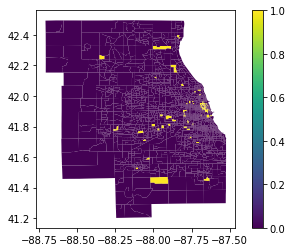

In [44]:
city_shp_merge[~city_shp_merge['exclusive'].isna()].plot(column = 'exclusive', legend=True)
plt.show()

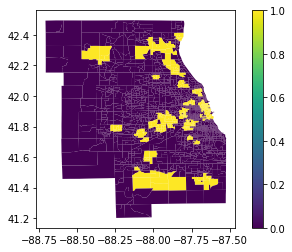

In [45]:
city_shp_merge[~city_shp_merge['proximity'].isna()].plot(column = 'proximity', legend=True)
plt.show()

#### Mortgage

In [46]:
temp = city_shp_merge.merge(mortgage, on = 'FIPS', how = 'left')
diff = temp['owneroccunits_x'] - temp['owneroccunits_y']
print(abs(diff).sum())

diff = temp['renterocc_units'] - temp['renteroccunits']
print(abs(diff).sum())  

0.0
0.0


In [47]:
mortgage.columns

Index(['FIPS', 'owneroccunits', 'renterocc_units', 'per_own_17', 'per_rent_17',
       'tot_units', 'applicationrate', 'high_dr20', 'high_dr25', 'high_dr30',
       'low_app_rate'],
      dtype='object')

In [48]:
city_shp_merge = city_shp_merge.merge(mortgage.drop(columns = ['owneroccunits']), on = 'FIPS', how = 'left')
len(city_shp_merge)

1983

#### Public housing

In [49]:
city_shp_merge = city_shp_merge.merge(pub_housing, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(pub_housing))

705


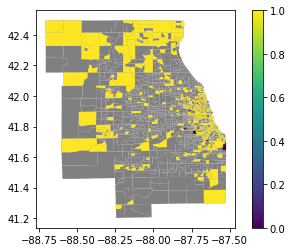

In [50]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['presence_ph_LIHTC'].isna()].plot(ax = ax, column = 'presence_ph_LIHTC', legend=True)
plt.show()

#### Prison

In [51]:
city_shp_merge = city_shp_merge.merge(prison, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(prison))

1985


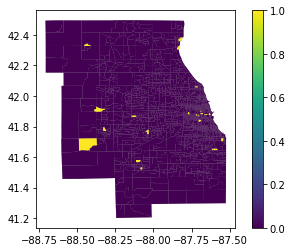

In [52]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['prison_flag'].isna()].plot(ax = ax, column = 'prison_flag', legend=True)
plt.show()

#### Low-income Home-ownership

In [53]:
city_shp_merge = city_shp_merge.merge(LI_HOW_flag, on = 'FIPS', how = 'left')
print(len(LI_HOW_flag))
LI_HOW_flag.head()

1983


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,17031010100,1,40.440002,0.0
1,17031010201,1,40.440002,0.0
2,17031010202,1,40.440002,0.0
3,17031010300,1,40.440002,0.0
4,17031010400,1,40.440002,0.0


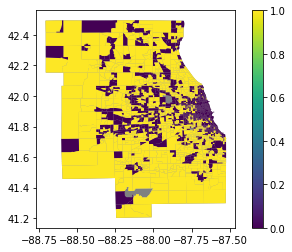

In [54]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_homeownership_LItracts'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_homeownership_LItracts',
                                                                              legend=True)
plt.show()

#### Foreclosure

In [55]:
city_shp_merge = city_shp_merge.merge(foreclosure, on = 'FIPS', how = 'left')
print(len(foreclosure))
foreclosure.head()

1847


,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,17031000000,##############################################...,5.0,1
1,17031010100,4.8%,5.0,0
2,17031010200,6.1%,5.0,1
3,17031010300,4.8%,5.0,0
4,17031010400,3.7%,5.0,0


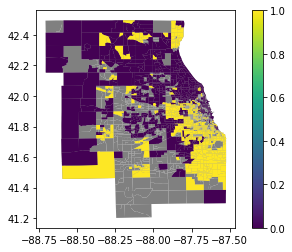

There are 634 NaN census tracts


In [56]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_foreclosurerate'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_foreclosurerate',
                                                                              legend=True)
plt.show()
print('There are',city_shp_merge['aboverm_foreclosurerate'].isna().sum(), 'NaN census tracts')

#### Neighborhood income
This includes 55% cut off for AMI predominance & 80-120 AMI cut offs

In [57]:
city_shp_merge = city_shp_merge.merge(neigh_income, on = 'FIPS', how = 'left')
len(city_shp_merge)

1983

In [58]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se

#### Vacancy

In [59]:
city_shp_merge = city_shp_merge.merge(vacancy, on = 'FIPS', how = 'left')
len(city_shp_merge)
vacancy.head()

,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,17031010100,0.056740,0.035809,1
1,17031010201,0.056446,0.035809,1
2,17031010202,0.126645,0.035809,1
3,17031010300,0.060383,0.035809,1
4,17031010400,0.015780,0.035809,0


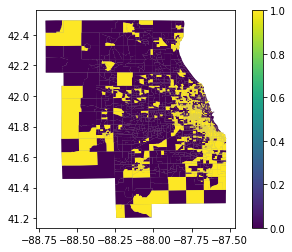

There are 0 NaN census tracts


In [60]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vacancy_rm_flag'].isna()].plot(ax = ax, column = 'vacancy_rm_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vacancy_rm_flag'].isna().sum(), 'NaN census tracts')

#### Units vs HH

In [61]:
city_shp_merge = city_shp_merge.merge(housing_units, on = 'FIPS', how = 'left')
len(city_shp_merge)
housing_units.head()

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,17031010100,2248,2626,2302,2624,2.0,-2.345786,0.076220,0.0,1.0
1,17031010201,2670,2994,2463,2941,53.0,8.404385,1.802108,1.0,1.0
2,17031010202,976,1216,1115,1218,-2.0,-12.466368,-0.164204,0.0,0.0
3,17031010300,2982,3395,2826,3254,141.0,5.520170,4.333128,1.0,1.0
4,17031010400,1870,2218,2098,2311,-93.0,-10.867493,-4.024232,0.0,0.0


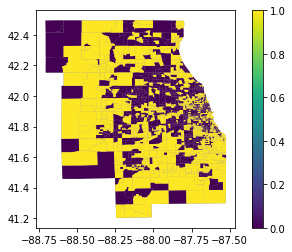

There are 0 NaN census tracts


In [62]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['flag_rm_units_change'].isna()].plot(ax = ax, column = 'flag_rm_units_change',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['flag_rm_units_change'].isna().sum(), 'NaN census tracts')

In [63]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se

## Methodology changes - New Approach

### Load affordability Data

In [64]:
### Load file
raw_zillow_aff = pd.read_stata(folder + '0805_aff_ACSchange_zillowrecent_60120_55cut_newapproach.dta')

### Rename trtid10 to FIPS and reformat number
zillow_aff = mf.trtid10_to_FIPS(raw_zillow_aff)

### Keep only records for the census tracts defined in FIPS variable
zillow_aff['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
zillow_aff = zillow_aff[zillow_aff['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
zillow_aff = zillow_aff.drop(columns='FIPS_temp')

### Keep only relevant columns
zillow_aff = zillow_aff[['FIPS', 'lmh_flag_new', 'aff_change_cat_full',
                         'ab_30pct_ch', 'ab_50pct_ch', 'ab_90percentile_ch']]

zillow_aff.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,17031010100,mixed_low,mixed_low_increase,0.0,0.0,0.0
1,17031010201,mixed_mod,mixed_mod_increase,0.0,0.0,0.0
2,17031010202,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
3,17031010300,mixed_mod,mixed_mod_marginal,0.0,0.0,0.0
4,17031010400,mixed_mod,mixed_mod_increase,0.0,0.0,0.0


#### Merge to city_shp_merge file

In [65]:
city_shp_merge = city_shp_merge.merge(zillow_aff, on = 'FIPS', how = 'left')
len(city_shp_merge)
zillow_aff.head()

,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,17031010100,mixed_low,mixed_low_increase,0.0,0.0,0.0
1,17031010201,mixed_mod,mixed_mod_increase,0.0,0.0,0.0
2,17031010202,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
3,17031010300,mixed_mod,mixed_mod_marginal,0.0,0.0,0.0
4,17031010400,mixed_mod,mixed_mod_increase,0.0,0.0,0.0


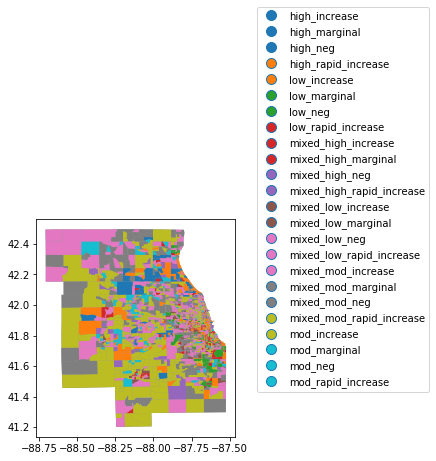

There are 0 NaN census tracts


In [66]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full',
                                                                        legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 2, 2))
plt.show()
print('There are',city_shp_merge['aff_change_cat_full'].isna().sum(), 'NaN census tracts')

### Load Rail Variables

In [67]:
### Load file
raw_rail = pd.read_stata(folder + 'Chicago_Rail_03012019.dta')

### Rename trtid10 to FIPS and reformat number
raw_rail = raw_rail.rename(columns = {'geoid':'trtid10'})
rail = mf.trtid10_to_FIPS(raw_rail)

### Keep only relevant columns
rail = rail[['FIPS', 'rail', 'shape_length', 'shape_area']]

rail.head()

,FIPS,rail,shape_length,shape_area
0,17001000100,0.0,0.157590,0.001362
1,17001000201,0.0,0.074654,0.000338
2,17001000202,0.0,0.052012,0.000160
3,17001000400,0.0,0.101669,0.000492
4,17001000500,0.0,0.047255,0.000133


#### Merge with city_shp_merge

In [68]:
city_shp_merge = city_shp_merge.merge(rail, on = 'FIPS', how = 'left')
len(city_shp_merge)

1983

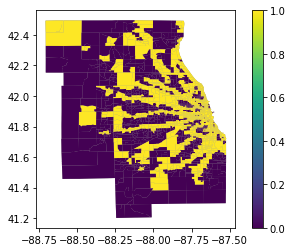

There are 0 NaN census tracts


In [69]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['rail'].isna()].plot(ax = ax, column = 'rail',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['rail'].isna().sum(), 'NaN census tracts')

### Load Low Income Immigration

In [70]:
raw_LI_immigration = pd.read_stata(folder + 'Chicago_2010_mover_interpolated.dta')

### Rename trtid10 to FIPS and reformat number
LI_immigration = mf.trtid10_to_FIPS(raw_LI_immigration)

LI_immigration.head()

,FIPS,reg_medinc_10,moveinincd_10,per_limove_10
0,17031010100,29969.0,626.0,0.408991
1,17031010201,29969.0,788.0,0.585531
2,17031010202,29969.0,366.0,0.747803
3,17031010300,29969.0,1140.0,0.612840
4,17031010400,29969.0,1150.0,0.747518


#### Merge with city_shp_merge

In [71]:
city_shp_merge = city_shp_merge.merge(LI_immigration, on = 'FIPS', how = 'left')
len(city_shp_merge)

1983

### Anchor Institutions

In [72]:
raw_anchor = pd.read_stata(folder + 'RR_042919.dta')

### Rename trtid10 to FIPS and reformat number
anchor = mf.trtid10_to_FIPS(raw_anchor)

### Keep only relevant columns
anchor = anchor[['FIPS', 'hosp_fl', 'uni_fl']]

### Create dummy for anchor institutions
df = anchor
df['anchor_institution'] = 0
df.loc[(df['hosp_fl'] == 1)|(df['uni_fl'] == 1), 'anchor_institution'] = 1

### Keep only records for the census tracts defined in FIPS variable
anchor['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
anchor = anchor[anchor['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
anchor = anchor.drop(columns='FIPS_temp')

anchor.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


,FIPS,hosp_fl,uni_fl,anchor_institution
0,13057090100,0.0,0.0,0
1,13057090200,0.0,1.0,1
2,13057090300,0.0,0.0,0
3,13057090400,0.0,0.0,0
4,13057090501,0.0,0.0,0


#### Merge with city_shp_merge

In [73]:
city_shp_merge = city_shp_merge.merge(anchor, on = 'FIPS', how = 'left')
len(anchor)

1985

## Additional Data Processing

In [74]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se

##### Ownership Variables

In [75]:
### Renamed in Stata file 
city_shp_merge['per_own_17']
city_shp_merge = city_shp_merge.rename(columns = {'per_own_17':'per_owners_17'})

##### Index US$ to 2017

In [76]:
raw_int_output = pd.read_stata(folder + 'joined_data_030619_cleaned.dta')

CPI_90_16 = raw_int_output['real_hinc_90']/raw_int_output['hinc_90']
print(CPI_90_16.unique())
CPI_90_16 = 1.83632 ### this is manually inputed based on print

CPI_00_16 = raw_int_output['real_hinc_00']/raw_int_output['hinc_00']
print(CPI_00_16.unique())
CPI_00_16 = 1.39377 ### this is manually inputed based on print

CPI_16_17 = 1.0213
CPI_90_17 = CPI_90_16*CPI_16_17
CPI_00_17 = CPI_00_16*CPI_16_17

print ('The CPI 1990-2016 is ', str(CPI_90_16))
print ('The CPI 2000-2016 is ', str(CPI_00_16))
print ('The CPI 2016-2017 is ', str(CPI_16_17))
print ('The CPI 1990-2017 is ', str(CPI_90_17))
print ('The CPI 2000-2017 is ', str(CPI_00_17))
raw_int_output[['trtid10', 'real_hinc_90', 'hinc_90']].head()

[1.8363198  1.83631992 1.83631968        nan]
[1.39376891 1.39376879        nan]
The CPI 1990-2016 is  1.83632
The CPI 2000-2016 is  1.39377
The CPI 2016-2017 is  1.0213
The CPI 1990-2017 is  1.875433616
The CPI 2000-2017 is  1.423457301


,trtid10,real_hinc_90,hinc_90
0,1.703101e+10,30276.892578,16487.810547
1,1.703101e+10,34831.191406,18967.933594
2,1.703101e+10,14468.484375,7879.065430
3,1.703101e+10,46976.734375,25582.000000
4,1.703101e+10,45895.140625,24993.000000


In [77]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se

### OTHER VARIABLES THAT NEED TO BE FOUND IN ORIGINAL DATASETS

In [78]:
### These variables needed to be pulled out of the original merge file, because they're not incorporated here
### Rename trtid10 to FIPS and reformat number
int_output_merge = mf.trtid10_to_FIPS(raw_int_output)

columns = ['FIPS', 'mhval_90', 'mrent_90', 'mhval_00', 'mrent_00', 'hh_00', 'hh_90', 'tot_jobs', 'larea',
           'per_col_00', 'per_col_90', 'per_rent_90', 'per_rent_00']

city_shp_merge = city_shp_merge.merge(int_output_merge[columns], on = 'FIPS', how = 'left')

### per rent is loaded with the mortgage data
columns = ['FIPS', 'pop_17', 'pop_17_se', 'hh_17', 'pop_90', 'mhval_17', 'mhval_17_se',
           'mrent_17', 'mrent_17_se', 'per_rent_17_se', 'per_col_17', 'per_col_17_se',
           'rhu_17', 'rhu_17_se', 'hu_17', 'hinc_17_se', 'per_nonwhite_17', 'per_units_pre50_17', 'per_built_00_17',
        'per_nhblk_17', 'per_asian_17', 'per_hisp_17']

city_shp_merge = city_shp_merge.merge(output[columns], on = 'FIPS', how = 'left')

len(city_shp_merge)

1983

In [79]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli2017',
 'li2017',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se

In [80]:
# city_shp_merge = city_shp_merge.merge(output[['FIPS', 'hinc_17_se']], on = 'FIPS', how = 'left')
# city_shp_merge.head()

In [81]:
### The input file originally used had 1990 data in US$1990
### hinc_90 is in US$ 19990
### real_hinc_90 is in US$ 2016 - for the output
### Because we're using 2017 data, we care about 2017 $

city_shp_merge['real_hinc_90'] = city_shp_merge['hinc_90']*CPI_90_17
city_shp_merge['real_mhval_90'] = city_shp_merge['mhval_90']*CPI_90_17
city_shp_merge['real_mrent_90'] = city_shp_merge['mrent_90']*CPI_90_17

city_shp_merge['real_hinc_00'] = city_shp_merge['hinc_00']*CPI_00_17
city_shp_merge['real_mhval_00'] = city_shp_merge['mhval_00']*CPI_00_17
city_shp_merge['real_mrent_00'] = city_shp_merge['mrent_00']*CPI_00_17

#### ***** Theses variables are missing because the tenure file is also missing ****
#### They were included from the output file, but this needs to be fixed

city_shp_merge['real_hinc_17'] = city_shp_merge['hinc_17']
city_shp_merge['real_mhval_17'] = city_shp_merge['mhval_17']
city_shp_merge['real_mrent_17'] = city_shp_merge['mrent_17']


city_shp_merge['real_mhval_10'] = city_shp_merge['mhval_10']
city_shp_merge['real_mrent_10'] = city_shp_merge['mrent_10']

city_shp_merge[['FIPS', 'real_hinc_90', 'hinc_90', 'real_mhval_90', 'mhval_90', 'real_mrent_90', 'mrent_90']].head()

,FIPS,real_hinc_90,hinc_90,real_mhval_90,mhval_90,real_mrent_90,mrent_90
0,17031010201,35573.097656,18967.933594,115410.179688,61537.867188,662.515686,353.26001
1,17031030200,54520.730469,29071.000000,320886.687500,171100.000000,960.221985,512.00000
2,17031031700,30571.443359,16301.000000,468858.406250,250000.000000,684.533264,365.00000
3,17031031900,53046.636719,28285.000000,337578.031250,180000.000000,853.322266,455.00000
4,17031050200,51910.125000,27679.000000,208923.296875,111400.000000,890.830933,475.00000


##### Flag VLI tracts

In [82]:
#### Renamed the variables ---- WHY?
city_shp_merge = city_shp_merge.rename(columns = {'vli2017':'vli_17',
                                                  'vli2000':'vli_00',
                                                  'vli1990':'vli_90',
                                                  'li1990':'li_90',
                                                  'li2000':'li_00',
                                                  'li2017':'li_17'})

df = city_shp_merge
df['vli_flag'] = 0
df.loc[(df['vli_17'] > 0.5), 'vli_flag'] = 1

# #### Weird thing about OLD LI data is that OLD li=50-80% AMI since vli=<50%AMI, need a var for all<80%
df['per_all_li_17'] = df['vli_17'] + df['li_17']
df['per_all_li_17'] = np.where((df['vli_17'].isna())&(df['li_17'].isna()), np.nan, df['per_all_li_17'])
df['per_all_li_00'] = df['vli_00'] + df['li_00']
df['per_all_li_00'] = np.where((df['vli_00'].isna())&(df['li_00'].isna()), np.nan, df['per_all_li_00'])
df['per_all_li_90'] = df['vli_90'] + df['li_90']
df['per_all_li_90'] = np.where((df['vli_90'].isna())&(df['li_90'].isna()), np.nan, df['per_all_li_90'])

#*The OLD low-inc vars are also proportions, so need to make them counts
#### ***** HH data needs to be uploaded *****
df['all_li_count_17'] = df['per_all_li_17']*df['hh_17']
df['all_li_count_00'] = df['per_all_li_00']*df['hh_00']
df['all_li_count_90'] = df['per_all_li_90']*df['hh_90']

print(df['per_all_li_17'].isna().sum())
print(df['vli_17'].isna().sum())
print(df['li_17'].isna().sum())

6
6
6


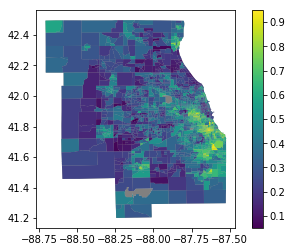

There are 6 NaN census tracts


In [83]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['per_all_li_17'].isna()].plot(ax = ax, column = 'per_all_li_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['per_all_li_17'].isna().sum(), 'NaN census tracts')

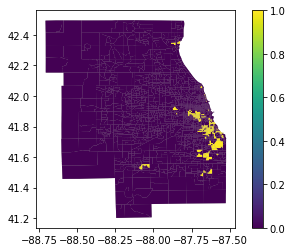

There are 0 NaN census tracts


In [84]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vli_flag'].isna()].plot(ax = ax, column = 'vli_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vli_flag'].isna().sum(), 'NaN census tracts')

##### Population flag and other pop data

In [85]:
df = city_shp_merge

### Create population dummy, 1 for pop >= 500
df['popflag17'] = np.where(df['pop_17']<500, 0, 1)

### Old income measures - what is this?
weight_inc = (df['hinc_17']*(df['pop_17']/8522948)).sum() ### What is this and what is 8,522,948
print(weight_inc)
print(df['hinc_17'].describe())
print(df['hinc_17'][df['hinc_17']<=79000].describe())  ### Why is this showing?

# ** POPLOSS & VLI FLAG
df['poploss_90_00'] = df['pop_00'] - df['pop_90']
df['poploss_00_17'] = df['pop_17'] - df['pop_00']
df['poploss_90_17'] = df['pop_17'] - df['pop_90']

df['pctch_poploss_90_00'] = (df['pop_00'] - df['pop_90'])/df['pop_90']
df['pctch_poploss_00_17'] = (df['pop_17'] - df['pop_00'])/df['pop_00']
df['pctch_poploss_90_17'] = (df['pop_17'] - df['pop_90'])/df['pop_90']

city_shp_merge.head()

73314.18780215483
count      1975.000000
mean      69949.421772
std       34829.653992
min       10471.000000
25%       44077.000000
50%       63938.000000
75%       89117.500000
max      250001.000000
Name: hinc_17, dtype: float64
count     1294.000000
mean     49743.700155
std      16531.791545
min      10471.000000
25%      37271.500000
50%      50049.500000
75%      63250.000000
max      79000.000000
Name: hinc_17, dtype: float64


,FIPS,COUNTYFP,geometry,countymedian_income90,hinc_90,hinc_00,hinc_16,_merge_hinc,regmedian_income90,vli_90,...,all_li_count_17,all_li_count_00,all_li_count_90,popflag17,poploss_90_00,poploss_00_17,poploss_90_17,pctch_poploss_90_00,pctch_poploss_00_17,pctch_poploss_90_17
0,17031010201,031,"POLYGON ((-87.684653 42.019485, -87.680448 42....",32673.0,18967.933594,23069.28125,38861.0,matched (3),28214.0,0.214283,...,1576.069871,1353.235962,1039.742432,1,1077.439941,-367.0,710.439941,0.166103,-0.048519,0.109525
1,17031030200,031,"POLYGON ((-87.67062299999999 41.998075, -87.66...",32673.0,29071.000000,46129.00000,65298.0,matched (3),28214.0,0.220353,...,1083.264873,852.476868,980.673889,1,-222.000000,-803.0,-1025.000000,-0.036227,-0.135963,-0.167265
2,17031031700,031,"POLYGON ((-87.667497 41.9689, -87.666198999999...",32673.0,16301.000000,29743.00000,42316.0,matched (3),28214.0,0.438843,...,1837.079182,2023.679565,1845.958618,1,-147.000000,-470.0,-617.000000,-0.019296,-0.062910,-0.080992
3,17031031900,031,"POLYGON ((-87.67407799999999 41.965169, -87.66...",32673.0,28285.000000,46902.00000,61379.0,matched (3),28214.0,0.241467,...,529.017431,451.137451,553.683472,1,-380.000000,27.0,-353.000000,-0.131990,0.010804,-0.122612
4,17031050200,031,"POLYGON ((-87.688683 41.961313, -87.68383 41.9...",32673.0,27679.000000,45951.00000,69623.0,matched (3),28214.0,0.199612,...,708.928772,666.072815,828.192932,1,-231.000000,647.0,416.000000,-0.048145,0.141668,0.086703


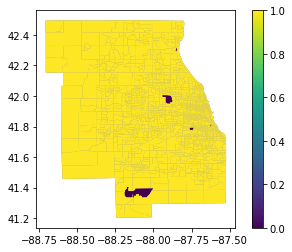

There are 0 NaN census tracts


In [86]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['popflag17'].isna()].plot(ax = ax, column = 'popflag17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['popflag17'].isna().sum(), 'NaN census tracts')

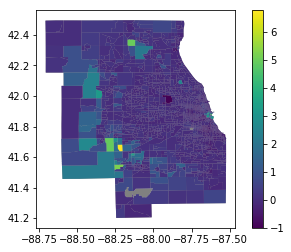

There are 2 NaN census tracts


In [87]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['pctch_poploss_00_17'].isna()].plot(ax = ax, column = 'pctch_poploss_00_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['pctch_poploss_00_17'].isna().sum(), 'NaN census tracts')

#### Employment Density & Housing Unit Density

In [88]:
df = city_shp_merge

### Employment & Housing Unit Density
df['empd_17'] = df['tot_jobs']/df['larea']
df['density_17'] = df['hu_17']/df['larea']

C:\Users\Gaby\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


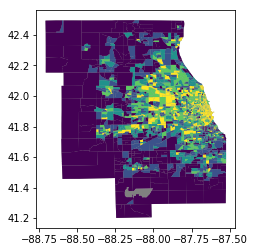

There are 2 NaN census tracts


In [89]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['empd_17'].isna()].plot(ax = ax, column = 'empd_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['empd_17'].isna().sum(), 'NaN census tracts')

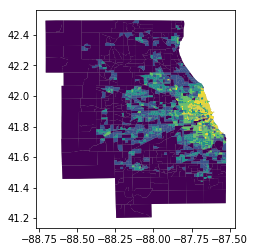

There are 0 NaN census tracts


In [90]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['density_17'].isna()].plot(ax = ax, column = 'density_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['density_17'].isna().sum(), 'NaN census tracts')

#### Some variation coefficients

In [91]:
### Variation Coefficient
### House value 2017
df['mhval_17_cv'] = df['mhval_17_se']/df['mhval_17']
df['mhval_17_flag15'] = np.where(df['mhval_17_cv']>.15, 1, 0)
df['mhval_17_flag30'] = np.where(df['mhval_17_cv']>.30, 1, 0)

### House rent 2017
df['mrent_17_cv'] = df['mrent_17_se']/df['mrent_17']
df['mrent_17_flag15'] = np.where(df['mrent_17_cv']>.15, 1, 0)
df['mrent_17_flag30'] = np.where(df['mrent_17_cv']>.30, 1, 0)

### Percentage of renters 2017
df['per_rent_17_cv'] = df['per_rent_17_se']/df['per_rent_17']
df['per_rent_17_flag15'] = np.where(df['per_rent_17_cv']>.15, 1, 0)
df['per_rent_17_flag30'] = np.where(df['per_rent_17_cv']>.30, 1, 0)

### Percentage COL 2017 - what is this?!
df['per_col_17_cv'] = df['per_col_17_se']/df['per_col_17']
df['per_col_17_flag15'] = np.where(df['per_col_17_cv']>.15, 1, 0)
df['per_col_17_flag30'] = np.where(df['per_col_17_cv']>.30, 1, 0)

### RHU 2017 - what is this?!
df['rhu_17_cv'] = df['rhu_17_se']/df['rhu_17']
df['rhu_17_flag15'] = np.where(df['rhu_17_cv']>.15, 1, 0)
df['rhu_17_flag30'] = np.where(df['rhu_17_cv']>.30, 1, 0)

### Population 2017
df['pop_17_cv'] = df['pop_17_se']/df['pop_17']
df['pop_17_flag15'] = np.where(df['pop_17_cv']>.15, 1, 0)
df['pop_17_flag30'] = np.where(df['pop_17_cv']>.30, 1, 0)

### HH Income 2017
df['hinc_17_cv'] = df['hinc_17_se']/df['hinc_17']
df['hinc_17_flag15'] = np.where(df['hinc_17_cv']>.15, 1, 0)
df['hinc_17_flag30'] = np.where(df['hinc_17_cv']>.30, 1, 0)

In [92]:
city_shp_merge[['mhval_17_cv', 'per_rent_17_cv', 'per_col_17_cv', 'rhu_17_cv', 'pop_17_cv', 'hinc_17_cv']].describe()

,mhval_17_cv,per_rent_17_cv,per_col_17_cv,rhu_17_cv,pop_17_cv,hinc_17_cv
count,1961.000000,1969.000000,1978.000000,1983.000000,1983.000000,1973.000000
mean,0.074198,0.000076,0.006840,inf,inf,0.108676
std,0.067818,0.000043,0.007009,NaN,NaN,0.058361
min,0.008074,0.000020,0.001484,0.032958,0.001096,0.016413
25%,0.036141,0.000051,0.004449,0.093477,0.039034,0.068885
50%,0.052797,0.000067,0.005785,0.134953,0.051653,0.095905
75%,0.083220,0.000090,0.007762,0.207855,0.068563,0.133844
max,0.604661,0.000911,0.241049,inf,inf,0.542331


In [93]:
city_shp_merge[['pop_17', 'rhu_17']].describe()

,pop_17,rhu_17
count,1983.000000,1983.000000
mean,4298.007060,564.636914
std,2152.395845,465.810242
min,0.000000,0.000000
25%,2909.500000,248.000000
50%,4110.000000,454.000000
75%,5336.000000,746.000000
max,28192.000000,5081.000000


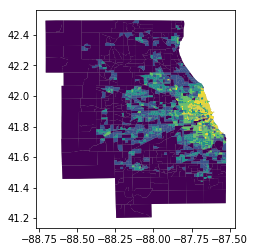

There are 0 NaN census tracts


In [94]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['density_17'].isna()].plot(ax = ax, column = 'density_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['density_17'].isna().sum(), 'NaN census tracts')

#### Income breakdowns for year 2000

In [95]:
raw_income_group = pd.read_stata(folder + '2000_Incomegroups.dta')
raw_income_group.columns

### Not going to use the countymedian_income. Will ue region median income instead.
### This value is provided in "inc_groups_hh by income_testing cutoffs_053119"
### Madeline defined RMI for 2017, but not for 2000 - how did she do it?

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'T090_001',
       'T090_002', 'T090_003', 'T090_004', 'T090_005', 'T090_006', 'T090_007',
       'T090_008', 'T090_009', 'T090_010', 'T090_011', 'T090_012', 'T090_013',
       'T090_014', 'T090_015', 'T090_016', 'T090_017', 'AREALAND', 'AREAWATR',
       'SUMLEV', 'GEOCOMP', 'REGION', 'DIVISION', 'countymedian_income00',
       '_merge'],
      dtype='object')

In [96]:
# raw_income_2000 = pd.read_stata(folder + '2000_income_data.dta')  ### Is this 2000_a.dta??
# raw_income_2000.columns

# * File 2000_income_data which will be used for interpolation doesn't have a ///
# * medium household income var ("med_inc" in neighborhood income code) which is ///
# * needed for mix-low  & mix-mod creation
# ** merge hhinc file to 2000_incomedata file, save, and run again  --- What this already done?! --- I'm confused

In [97]:
### This is supposed to contain HH income for 2017, but it only has 2016 data
### Apparently it doesn't matter bc I only care about 2000 data? This is weird
raw_income_region = pd.read_stata(folder + 'hhinc_singleregion.dta')

### Rename trtid10 to FIPS and reformat number
income_region = mf.trtid10_to_FIPS(raw_income_region)

### Keep only relevant columns
income_region = income_region[['FIPS', 'hinc_00']]

### Keep only records for the census tracts defined in FIPS variable
income_region['FIPS_temp']=income_region['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_region = income_region[income_region['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_region = income_region.drop(columns='FIPS_temp')

### Following the code
income_group = raw_income_group.drop(columns = ['_merge'])
income_group = income_group.merge(income_region, on = 'FIPS', how = 'left')

### Keep only relevant columns
income_group = income_group.drop(columns = ['AREALAND', 'AREAWATR', 'SUMLEV', 'GEOCOMP', 'REGION', 'DIVISION'])

### Rename variables
income_group = income_group.rename(columns = {'hinc_00':'med_inc',
                                              'T090_001':'denominator_00', ### What is this number? - Total HH?
                                              'T090_002':'I_10000',
                                              'T090_003':'I_15000',
                                              'T090_004':'I_20000',
                                              'T090_005':'I_25000',
                                              'T090_006':'I_30000',
                                              'T090_007':'I_35000',
                                              'T090_008':'I_40000',
                                              'T090_009':'I_45000',
                                              'T090_010':'I_50000',
                                              'T090_011':'I_60000',
                                              'T090_012':'I_75000',
                                              'T090_013':'I_100000',
                                              'T090_014':'I_125000',
                                              'T090_015':'I_150000',
                                              'T090_016':'I_200000',
                                              'T090_017':'I_201'})
income_group.columns

['17031', '17043', '17089', '17093', '17097', '17111', '17197']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201',
       'countymedian_income00', 'med_inc'],
      dtype='object')

#### Determining AMI - Look at other code

In [98]:
# ****** DETERMINING AMI *********
# * issue - how do I assign AMI - use Madeline's median of median method (mentioned in Neighb income read.me)
# * accidentally deleted a file from Neighb Income Level Archive file while looking for median-of-tract-medians method
# * intended to run my own median-of-medians method to determine 2000 AMI >> Do file to be found in:
# 	* Typologies > Master Datasets > Updated Typologies Summer 2019 ///
# 		* > Accessory Typology Processing> Regional AMIs - Median of Medians Method

# *Kamene definition: Atlanta - $ 51,760.11
# *Kamene definition: Chicago - $ 42,917
# *Kamene definition: Denver - $ 65,785.05
# *Kamene definition: Memphis - $ 44,560.60


# * CODE from Income Interpolation 1990 2000 2016.do
reg_med_inc_00 = 42917

#### Creates income cutoffs

In [99]:
income_group.describe()

,denominator_00,I_10000,I_15000,I_20000,I_25000,I_30000,I_35000,I_40000,I_45000,I_50000,I_60000,I_75000,I_100000,I_125000,I_150000,I_200000,I_201,countymedian_income00,med_inc
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3123.000000,1983.000000
mean,1471.560397,122.812880,80.898750,80.271067,85.641141,86.401794,88.529958,83.638577,81.978533,73.146107,138.223005,167.108619,170.381288,89.911567,43.170138,38.146748,41.300224,47512.573487,47750.800781
std,588.969423,115.728689,56.893851,50.673531,52.152860,50.786986,49.896535,47.582051,46.107768,40.130943,72.678075,94.257366,112.274563,78.291082,44.624216,50.750576,78.427772,10225.181273,28410.117188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24946.000000,0.000000
25%,1058.000000,49.274143,37.310110,42.000000,46.000000,48.000000,52.000000,49.000000,48.879561,43.285164,86.000000,97.000000,82.000000,30.000000,10.000000,6.000000,6.000000,41532.000000,27887.373047
50%,1413.000000,91.000000,71.000000,72.000000,78.000000,80.851916,83.000000,78.000000,77.421576,69.664460,131.000000,157.000000,150.312689,66.005677,28.000000,18.000000,15.000000,45922.000000,42917.000000
75%,1823.000000,159.999895,112.000000,108.206160,116.000000,116.000000,116.002274,111.000000,108.000000,97.000000,180.000000,224.062522,241.910490,130.229245,62.000000,49.035380,39.000000,45922.000000,60222.500000
max,4975.000000,1243.999200,409.000000,364.000000,337.000000,491.000000,443.000000,377.000000,345.000000,258.909143,502.000000,646.000000,618.000000,481.000000,266.987615,368.001039,874.701651,67887.000000,271762.437500


In [100]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    print(i)
    column.append('prop_'+i)
    income_group['prop_'+i] = income_group['I_'+i]/income_group['denominator_00']
print(column)

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000
200000
['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


###### Determines 80% cutoff

In [101]:
### 80% cutoff of the regional median income
df = income_group
reg_med_inc80_00 = 0.8*reg_med_inc_00

df['inc80_cumulative'] = 0
df['inc80_00'] = 0

### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)
    
df = df.drop(columns = ['inc80_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Determines 120% cutoff

In [102]:
df = income_group
reg_med_inc120_00 = 1.2*reg_med_inc_00

df['inc120_cumulative'] = 0
df['inc120_00'] = 0


### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)
    
df = df.drop(columns = ['inc120_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Generate share of each income group

In [103]:
income_group['low_80120_00'] = income_group['inc80_00']
income_group['mod_80120_00'] = income_group['inc120_00'] - income_group['inc80_00']
income_group['high_80120_00'] = 1 - income_group['inc120_00']
income_group.head(3)

,FIPS,NAME,QName,NATION,STATE,COUNTY,CT,denominator_00,I_10000,I_15000,...,prop_125000,prop_150000,prop_200000,inc80_cumulative,inc80_00,inc120_cumulative,inc120_00,low_80120_00,mod_80120_00,high_80120_00
0,17001000100,Census Tract 1,"Census Tract 1, Adams County, Illinois",00,17,001,000100,1959.0,173.0,150.0,...,0.016335,0.0,0.000000,0.990812,0.526362,0.990812,0.746405,0.526362,0.220043,0.253595
1,17001000201,Census Tract 2.01,"Census Tract 2.01, Adams County, Illinois",00,17,001,000201,811.0,60.0,95.0,...,0.000000,0.0,0.008631,0.991369,0.556765,0.991369,0.832557,0.556765,0.275792,0.167443
2,17001000202,Census Tract 2.02,"Census Tract 2.02, Adams County, Illinois",00,17,001,000202,1099.0,132.0,85.0,...,0.000000,0.0,0.000000,0.990901,0.561305,0.990901,0.777210,0.561305,0.215905,0.222790


In [104]:
### Excludes CT without data
### According to stata code comment, I should have 25 CT without data, but I have zero

df = income_group
df['validsample'] = np.where((df['inc80_00'] == 0)|(df['inc120_00'] == 0), 0, 1)
df['validsample'].describe()

count    3123.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: validsample, dtype: float64

In [105]:
df = income_group

### Low income
df['low_pdmt_80120'] = np.where((df['low_80120_00']>=0.5)&(df['mod_80120_00']<0.4)&(df['high_80120_00']<0.4),1,0)
df['low_pdmt_80120'][df['validsample']==0] = 0

## High income
df['high_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']<0.4)&(df['high_80120_00']>=0.5),1,0)
df['high_pdmt_80120'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']>=0.5)&(df['high_80120_00']<0.4),1,0)
df['mod_pdmt_80120'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_80120'] = np.where((df['low_80120_00']>=0.4)&(df['mod_80120_00']<0.35)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_low_80120'][df['validsample']==0] = 0
### Mixed-Moderate income
df['mix_mod_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']>=0.4)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_mod_80120'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']<0.35)&(df['high_80120_00']>=0.4)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_high_80120'][df['validsample']==0] = 0

### Mixed-Low-Mod income
df['mix_l_m_80120'] = np.where((df['low_80120_00']>=0.35)&(df['mod_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_m_80120'][df['validsample']==0] = 0

### Mixed-Mod-High income
### Mixed-Low-Mod income
df['mix_m_h_80120'] = np.where((df['mod_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_m_h_80120'][df['validsample']==0] = 0

### Mixed-Low-High income
df['mix_l_h_80120'] = np.where((df['low_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_h_80120'][df['validsample']==0] = 0

### Mixed-Uni income
df['mix_uni_80120'] = np.where((df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0)&
                               (df['mix_l_m_80120']==0)&(df['mix_m_h_80120']==0)&(df['mix_l_h_80120']==0),1,0)
df['mix_uni_80120'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is

###### Compute income categories

In [106]:
income_group['inc_cat_80120'] = 0
income_group.loc[income_group['low_pdmt_80120']==1, 'inc_cat_80120'] = 1
income_group.loc[income_group['mix_low_80120']==1, 'inc_cat_80120'] = 2
income_group.loc[income_group['mix_l_m_80120']==1, 'inc_cat_80120'] = 3
income_group.loc[income_group['mix_l_h_80120']==1, 'inc_cat_80120'] = 4
income_group.loc[income_group['mix_uni_80120']==1, 'inc_cat_80120'] = 5
income_group.loc[income_group['mod_pdmt_80120']==1, 'inc_cat_80120'] = 6
income_group.loc[income_group['mix_mod_80120']==1, 'inc_cat_80120'] = 7
income_group.loc[income_group['mix_m_h_80120']==1, 'inc_cat_80120'] = 8
income_group.loc[income_group['mix_high_80120']==1, 'inc_cat_80120'] = 9
income_group.loc[income_group['high_pdmt_80120']==1, 'inc_cat_80120'] = 10
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [107]:
income_group.groupby('inc_cat_80120')['FIPS'].count()

inc_cat_80120
1      758
2      339
3        1
4      563
5       36
8        1
9      307
10    1118
Name: FIPS, dtype: int64

###### Drop prop_XXXX columns

In [108]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    column.append('prop_'+i)
print(column)

income_group = income_group.drop(columns = column)
income_group.columns

['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201',
       'countymedian_income00', 'med_inc', 'inc80_cumulative', 'inc80_00',
       'inc120_cumulative', 'inc120_00', 'low_80120_00', 'mod_80120_00',
       'high_80120_00', 'validsample', 'low_pdmt_80120', 'high_pdmt_80120',
       'mod_pdmt_80120', 'mix_low_80120', 'mix_mod_80120', 'mix_high_80120',
       'mix_l_m_80120', 'mix_m_h_80120', 'mix_l_h_80120', 'mix_uni_80120',
       'inc_cat_80120'],
      dtype='object')

##### New Methodology

In [109]:
### New methodology (on 80/120) where we use 55%+ to define predominantly low/predominantly mod/predominantly high;
### then if % is no greater than X, define category based on median hh income

df = income_group

### Low income
df['low_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']>=0.55)&(df['mod_80120_00']<0.45)&(df['high_80120_00']<0.45),1,0)
df['low_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

## High income
df['high_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']<0.45)&(df['high_80120_00']>=0.55),1,0)
df['high_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']>=0.55)&(df['high_80120_00']<0.45),1,0)
df['mod_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']<reg_med_inc80_00),1,0)
df['mix_low_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Moderate income
df['mix_mod_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc80_00)&
                                              (df['med_inc']<reg_med_inc120_00),1,0)
df['mix_mod_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc120_00),1,0)
df['mix_high_55cut_80120_medhhinc'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value

###### Compute income categories

In [110]:
income_group['low_pdmt_55cut_80120_medhhinc'] = 0
income_group.loc[income_group['low_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 1
income_group.loc[income_group['mix_low_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 2
income_group.loc[income_group['mod_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 3
income_group.loc[income_group['mix_mod_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 4
income_group.loc[income_group['mix_high_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 5
income_group.loc[income_group['high_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 6
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [111]:
income_group.groupby('inc_cat_55cut_80120_medhhinc')['FIPS'].count()

inc_cat_55cut_80120_medhhinc
2.0    263
4.0    493
5.0    143
6.0    905
Name: FIPS, dtype: int64

###### Merge with master file

In [112]:
### Keep only records for the census tracts defined in FIPS variable
income_group['FIPS_temp']=income_group['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_group = income_group[income_group['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_group = income_group.drop(columns='FIPS_temp')

### Keep only relevant columns
income_group = income_group.drop(columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'denominator_00',
                                             'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000', 'I_35000',
                                             'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000', 'I_100000',
                                             'I_125000', 'I_150000', 'I_200000', 'I_201','countymedian_income00',
                                             'med_inc', 'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00'])

### Rename to differentiate from 2017 data loaded in neigh_income file
income_group = income_group.rename(columns = {'low_pdmt_80120':'low_pdmt_80120_00',
                                                'high_pdmt_80120':'high_pdmt_80120_00',
                                                'mod_pdmt_80120':'mod_pdmt_80120_00',
                                                'inc_cat_55cut_80120_medhhinc':'inc_cat_55cut_80120_medhhinc_00',
                                                'mix_mod_55cut_80120_medhhinc':'mix_mod_55cut_80120_medhhinc_00',
                                                'mix_low_55cut_80120_medhhinc':'mix_low_55cut_80120_medhhinc_00',
                                                'mix_high_55cut_80120_medhhinc':'mix_high_55cut_80120_medhhinc_00',
                                                'mod_pdmt_55cut_80120_medhhinc':'mod_pdmt_55cut_80120_medhhinc_00',
                                                'high_pdmt_55cut_80120_medhhinc':'high_pdmt_55cut_80120_00',
                                                'low_pdmt_55cut_80120_medhhinc':'low_pdmt_55cut_80120_medhhinc_00',
                                                'inc_cat_80120':'inc_cat_80120_00',
                                                'mix_low_80120':'mix_low_80120_00',
                                                'mix_mod_80120':'mix_mod_80120_00',
                                                'mix_high_80120':'mix_high_80120_00',
                                                'mix_l_m_80120':'mix_l_m_80120_00',
                                                'mix_l_h_80120':'mix_l_h_80120_00',
                                                'mix_m_h_80120':'mix_m_h_80120_00',
                                                'mix_uni_80120':'mix_uni_80120_00'})

### Merge files
city_shp_merge = city_shp_merge.merge(income_group, on = 'FIPS', how = 'left')
print(reg_med_inc_00, reg_med_inc120_00, reg_med_inc80_00)

['17031', '17043', '17089', '17093', '17097', '17111', '17197']
42917 51500.4 34333.6


In [113]:
income_group.columns

Index(['FIPS', 'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120_00', 'high_pdmt_80120_00', 'mod_pdmt_80120_00',
       'mix_low_80120_00', 'mix_mod_80120_00', 'mix_high_80120_00',
       'mix_l_m_80120_00', 'mix_m_h_80120_00', 'mix_l_h_80120_00',
       'mix_uni_80120_00', 'inc_cat_80120_00',
       'low_pdmt_55cut_80120_medhhinc_00', 'high_pdmt_55cut_80120_00',
       'mod_pdmt_55cut_80120_medhhinc_00', 'mix_low_55cut_80120_medhhinc_00',
       'mix_mod_55cut_80120_medhhinc_00', 'mix_high_55cut_80120_medhhinc_00',
       'inc_cat_55cut_80120_medhhinc_00'],
      dtype='object')

In [114]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'countymedian_income90',
 'hinc_90',
 'hinc_00',
 'hinc_16',
 '_merge_hinc',
 'regmedian_income90',
 'vli_90',
 'li_90',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'countymedian_income00',
 'vli_00',
 'li_00',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'hinc_17',
 'regmedhhi_17',
 'vli_17',
 'li_17',
 'mi2017',
 'hmi2017',
 'hi2017',
 'vhi2017',
 'r_per_nonwhite_90',
 'nhwhite_90',
 'RC1990SF3_001_P012_001',
 'pop_00',
 'white_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'per_carcommute_00',
 'per_nonwhite_90',
 'nonwhite_90',
 'reg_medindinc_17',
 'moveinincd17',
 'per_limove17',
 'reg_medindinc_09',
 'moveinincd09',
 'per_limove09',
 'mrent_10',
 'mhval_10',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se_rente

In [115]:
city_shp_merge.groupby('inc_cat_80120_00').count()['FIPS']

inc_cat_80120_00
1     371
2     125
3       1
4     326
5      21
8       1
9     184
10    954
Name: FIPS, dtype: int64

In [116]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc_00').count()['FIPS']

inc_cat_55cut_80120_medhhinc_00
2.0    263
4.0    493
5.0    143
6.0    802
Name: FIPS, dtype: int64

In [117]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc').count()['FIPS']

inc_cat_55cut_80120_medhhinc
1.0    525
2.0    147
4.0    589
5.0    146
6.0    570
Name: FIPS, dtype: int64

ORIGINAL METHODOLOGY - 2000 CATEGORIES


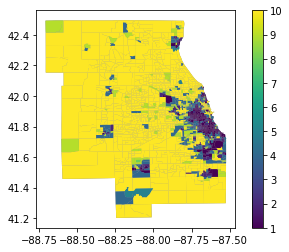

There are 0 NaN census tracts


In [118]:
print('ORIGINAL METHODOLOGY - 2000 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_80120_00'].isna()].plot(ax = ax, column = 'inc_cat_80120_00', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_80120_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2000 CATEGORIES


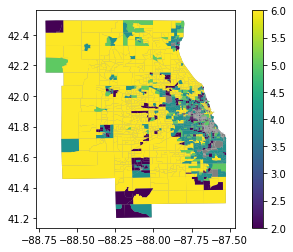

There are 282 NaN census tracts


In [119]:
print('NEW METHODOLOGY - 2000 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc_00', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2017 CATEGORIES


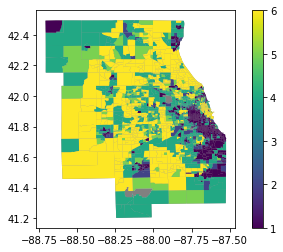

There are 6 NaN census tracts


In [120]:
print('NEW METHODOLOGY - 2017 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna().sum(), 'NaN census tracts')

## Rename variables and clean code for doing typology run

In [121]:
## Rename Variables
city_shp_merge = city_shp_merge.rename(columns = {'Fstate':'state_str',
                                                 'Fcounty':'county_str',
                                                 'Ftract':'tract_str',
                                                 'per_owners_90':'per_own_90',
                                                 'per_owners_00':'per_own_00',
                                                 'per_owners_17':'per_own_17',
                                                 'high_dr20':'high_denialrate20',
                                                 'high_dr25':'high_denialrate25',
                                                 'high_dr30':'high_denialrate30',
                                                 'exclusive':'exclusive_tract',
                                                 'per_limove17':'per_limove_17'})
# print("ERROR - ['Fstate' 'Fcounty' 'Ftract' 'per_owners_90' 'per_owners_00'] not in index")

### Drop Variables
# city_shp_merge = city_shp_merge.drop(columns=['geo_stusab', 'geo_sumlev', 'geo_geocomp', 'geo_fileid', 'geo_logrecno',
#                                               'geo_us', 'geo_region'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_division', 'geo_statece', 'geo_state', 'geo_county', 'geo_cousub',
#                                               'geo_place'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_placese', 'geo_blkgrp', 'geo_concit', 'geo_aianhh', 'geo_aianhhfp',
#                                               'geo_aihhtli', 'geo_aitsce'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_aits', 'geo_anrc', 'geo_cbsa', 'geo_csa', 'geo_metdiv',
#                                               'geo_macc', 'geo_memi', 'geo_necta'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_cnecta', 'geo_nectadiv', 'geo_ua', 'geo_uacp', 'geo_cdcurr',
#                                               'geo_sldu', 'geo_sldl', 'geo_vtd', 'geo_zcta3'])
# city_shp_merge = city_shp_merge.drop(columns=['geo_zcta5', 'geo_submcd', 'geo_sdelm', 'geo_sdsec', 'geo_sduni',
#                                               'geo_ur', 'geo_pci', 'geo_taz', 'geo_uga', 'geo_bttr', 'geo_btbg',
#                                               'geo_puma5', 'geo_puma1', 'geo_nation', 'geo_ct'])

# city_shp_merge = city_shp_merge.drop(columns=['acs16_5yr_b11005001', 'acs16_5yr_b11005003', 'acs16_5yr_b11005004',
#                                               'acs16_5yr_b11005005', 'acs16_5yr_b11005006', 'acs16_5yr_b11005007',
#                                               'acs16_5yr_b11005008', 'acs16_5yr_b11005009', 'acs16_5yr_b11005010',
#                                               'acs16_5yr_b11005011', 'acs16_5yr_b11005012', 'acs16_5yr_b11005013',
#                                               'acs16_5yr_b11005014', 'acs16_5yr_b11005015', 'acs16_5yr_b11005016',
#                                               'acs16_5yr_b11005017', 'acs16_5yr_b11005018', 'acs16_5yr_b11005019',
#                                               'acs16_5yr_b11005001s', 'acs16_5yr_b11005003s', 'acs16_5yr_b11005004s',
#                                               'acs16_5yr_b11005005s', 'acs16_5yr_b11005006s', 'acs16_5yr_b11005007s',
#                                               'acs16_5yr_b11005008s', 'acs16_5yr_b11005009s', 'acs16_5yr_b11005010s',
#                                               'acs16_5yr_b11005011s', 'acs16_5yr_b11005012s', 'acs16_5yr_b11005013s',
#                                               'acs16_5yr_b11005014s', 'acs16_5yr_b11005015s', 'acs16_5yr_b11005016s',
#                                               'acs16_5yr_b11005017s', 'acs16_5yr_b11005018s', 'acs16_5yr_b11005019s',
#                                               'acs16_5yr_b11005003s'])

#### This seems like a waste of time - should only pull in variables that actually matter
#### instead of havind to do all this cleaning.

#### The following variables have not been coded for dropping
# tot_00 male_00 none_m00 nursery_4th_m00 _5th_6th_m00 _7th_8th_m00 _9th_m00 _10th_m00 _11th_m00 _12th_nd_m00 hs_grad_m00
# some_colA_m00 some_colB_m00 assoc_m00 bach_m00 master_m00 prof_m00 fem_00 none_f00 nursery_4th_f00 _5th_6th_f00 _7th_8th_f00 _9th_f00 _10th_f00
# _11th_f00 _12th_nd_f00 hs_grad_f00 some_colA_f00 some_colB_f00 assoc_f00 bach_f00 master_f00 prof_f00 doc_f00 age_25_90 age_25_90 hs_nd_90 hs_grad_90
# some_col_90 assoc_90 bach_90 grad_prof_90
# hhwchild_17 per_hhwchild_17 per_hhwchild_90

city_shp_merge = city_shp_merge.drop(columns = ['_merge_hinc'])

#### Edit zillow/affordability data to assign numeric code

In [122]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                      7
mixed_high            83
mixed_low             90
mixed_mod           1194
predominantly HI     147
predominantly LI     277
predominantly MI     185
Name: FIPS, dtype: int64

HOUSING AFFORDABILITY


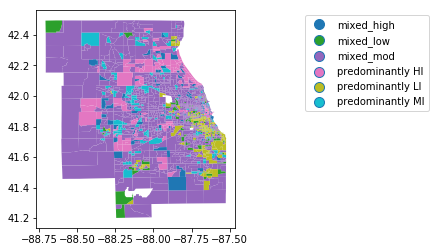

There are 7 NaN census tracts


In [123]:
print('HOUSING AFFORDABILITY')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['lmh_flag_new']!='.'].plot(ax = ax, column = 'lmh_flag_new', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['lmh_flag_new']=='.').sum(), 'NaN census tracts')

In [124]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                      7
mixed_high            83
mixed_low             90
mixed_mod           1194
predominantly HI     147
predominantly LI     277
predominantly MI     185
Name: FIPS, dtype: int64

In [125]:
city_shp_merge.groupby('aff_change_cat_full').count()['FIPS']

aff_change_cat_full
data unavailable               8
high_increase                 40
high_marginal                 13
high_neg                       6
high_rapid_increase           88
low_increase                  94
low_marginal                  59
low_neg                       26
low_rapid_increase            97
mixed_high_increase           19
mixed_high_marginal            4
mixed_high_neg                 3
mixed_high_rapid_increase     57
mixed_low_increase            32
mixed_low_marginal            24
mixed_low_neg                  6
mixed_low_rapid_increase      28
mixed_mod_increase           401
mixed_mod_marginal           163
mixed_mod_neg                 73
mixed_mod_rapid_increase     557
mod_increase                  41
mod_marginal                  29
mod_neg                       22
mod_rapid_increase            93
Name: FIPS, dtype: int64

MARKET CHANGE CATEGORIES


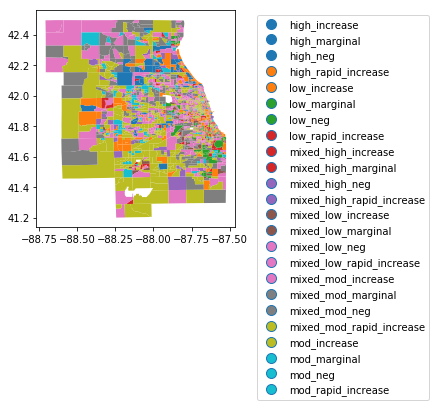

There are 8 NaN census tracts


In [126]:
print('MARKET CHANGE CATEGORIES')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['aff_change_cat_full']=='data unavailable').sum(), 'NaN census tracts')

In [127]:
city_shp_merge['lmh_flag_new_encoded'] = 0
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly LI', 'lmh_flag_new_encoded'] = 1
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_low', 'lmh_flag_new_encoded'] = 2
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly MI', 'lmh_flag_new_encoded'] = 3
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_mod', 'lmh_flag_new_encoded'] = 4
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly HI', 'lmh_flag_new_encoded'] = 5
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_high', 'lmh_flag_new_encoded'] = 6

city_shp_merge['aff_change_cat_full_encoded'] = 0
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_neg', 'aff_change_cat_full_encoded'] = 1
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_marginal', 'aff_change_cat_full_encoded'] = 2
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_increase', 'aff_change_cat_full_encoded'] = 3
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_rapid_increase', 'aff_change_cat_full_encoded'] = 4
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_neg', 'aff_change_cat_full_encoded'] = 5
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_marginal', 'aff_change_cat_full_encoded'] = 6
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_increase', 'aff_change_cat_full_encoded'] = 7
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_rapid_increase', 'aff_change_cat_full_encoded'] = 8
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_neg', 'aff_change_cat_full_encoded'] = 9
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_marginal', 'aff_change_cat_full_encoded'] = 10
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_increase', 'aff_change_cat_full_encoded'] = 11
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_rapid_increase', 'aff_change_cat_full_encoded'] = 12
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_neg', 'aff_change_cat_full_encoded'] = 13
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_marginal', 'aff_change_cat_full_encoded'] = 14
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_increase', 'aff_change_cat_full_encoded'] = 15
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_rapid_increase', 'aff_change_cat_full_encoded'] = 16
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_neg', 'aff_change_cat_full_encoded'] = 17
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_marginal', 'aff_change_cat_full_encoded'] = 18
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_increase', 'aff_change_cat_full_encoded'] = 19
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_rapid_increase', 'aff_change_cat_full_encoded'] = 20
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_neg', 'aff_change_cat_full_encoded'] = 21
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_marginal', 'aff_change_cat_full_encoded'] = 22
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_increase', 'aff_change_cat_full_encoded'] = 23
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_rapid_increase', 'aff_change_cat_full_encoded'] = 24

In [128]:
### Generate affordability/change category -- for mapping
df = city_shp_merge
var = 'aff_change_cat_map'
df[var] = ''
df[var] = np.where((df['aff_change_cat_full']=='low_neg')|(df['aff_change_cat_full']=='low_marginal'),'low_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_increase','low_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_rapid_increase','low_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_neg')|(df['aff_change_cat_full']=='mixed_low_marginal')|
                   (df['aff_change_cat_full']=='mod_neg')|(df['aff_change_cat_full']=='mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_mod_neg')|(df['aff_change_cat_full']=='mixed_mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_high_neg')|(df['aff_change_cat_full']=='mixed_high_marginal')
                   ,'modmix_neg_little', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_increase')|
                   (df['aff_change_cat_full']=='mod_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_increase')|
                   (df['aff_change_cat_full']=='mixed_high_increase'),'modmix_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_rapid_increase')|
                   (df['aff_change_cat_full']=='mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_high_rapid_increase'),'modmix_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='high_neg')|(df['aff_change_cat_full']=='high_marginal'),'high_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_increase','high_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_rapid_increase','high_rapid_increase', df[var])

In [129]:
df['aff_change_cat_map'].unique()

array(['modmix_increase', 'modmix_neg_little', 'modmix_rapid_increase',
       'high_rapid_increase', 'high_increase', 'low_increase',
       'low_rapid_increase', 'low_neg_little', '', 'high_neg_little'],
      dtype=object)

In [130]:
df.groupby('aff_change_cat_map').count()['FIPS']

aff_change_cat_map
                           8
high_increase             40
high_neg_little           19
high_rapid_increase       88
low_increase              94
low_neg_little            85
low_rapid_increase        97
modmix_increase          493
modmix_neg_little        324
modmix_rapid_increase    735
Name: FIPS, dtype: int64

##### Other

In [131]:
### This variable doesn't exits!
### And i don't know what this does/means
# destring per_nonwhite_16_moe, replace force

## Output file for running typologies code

In [132]:
city_shp_merge.to_csv(out_folder + 'Chicago/typology_input.csv')

## Mapping Data for Review

In [133]:
### Review of census tracts that are "extra"
housing_units[~housing_units['FIPS'].isin(city_shp_merge['FIPS'])]['FIPS']
### These are the ones located in the water!

1318    17031990000
1780    17097990000
Name: FIPS, dtype: object

In [134]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_17_tract_500k.shp')
city_shp['COUNTYFP'].unique()

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']=str(17)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

['17031', '17043', '17089', '17093', '17097', '17111', '17197']
There are 1983 census tracts in this city


,GEOID,COUNTYFP,geometry
0,17031010201,031,"POLYGON ((-87.684653 42.019485, -87.680448 42...."
1,17031030200,031,"POLYGON ((-87.67062299999999 41.998075, -87.66..."
2,17031031700,031,"POLYGON ((-87.667497 41.9689, -87.666198999999..."
3,17031031900,031,"POLYGON ((-87.67407799999999 41.965169, -87.66..."
4,17031050200,031,"POLYGON ((-87.688683 41.961313, -87.68383 41.9..."


[32673. 48876. 40080. 46047. 43471. 41195. 42834.]


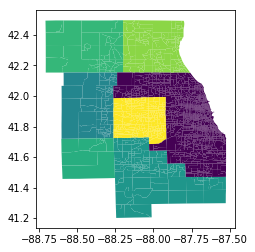

In [135]:
print(city_shp_merge['countymedian_income90'].unique())
city_shp_merge.plot(column = 'countymedian_income90')

In [136]:
print(city_shp_merge['mhval_10'].isna().sum())
print(city_shp_merge['mhval_10'].describe())

15
count    1.968000e+03
mean     2.698191e+05
std      1.366893e+05
min      2.070000e+04
25%      1.776750e+05
50%      2.390000e+05
75%      3.239500e+05
max      1.000001e+06
Name: mhval_10, dtype: float64


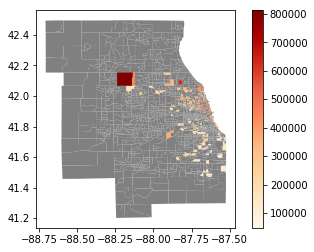

In [137]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge.dropna().plot(ax = ax, column = 'mhval_10', cmap='OrRd', legend=True)
plt.show()

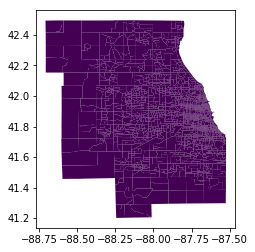

In [138]:
city_shp_merge.plot(column = 'regmedian_income90')
plt.show()